In [70]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Models from Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import lightgbm as lgb

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
#To Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading both Training and Testing file separately....
#creating a column dataset in both test and train dataset which contains values of test and train so that we can use them later when do modelling.
df_train_food=pd.read_excel("Food_Data_Train.xlsx")
df_train_food["dataset"]="train"
df_test_food=pd.read_excel("Food_Data_Test.xlsx")
df_test_food["dataset"]="test"

In [3]:
#Display The head ==> To Check if Data is Properly Imported from df_train_food
df_train_food.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,dataset
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,train
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,train
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,train
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,train
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,train


In [4]:
#Display The head ==> To Check if Data is Properly Imported from df_test_food

df_test_food.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,dataset
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes,test
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes,test
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes,test
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes,test
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes,test


In [5]:
#combining the dataset
df=pd.concat([df_train_food,df_test_food])
df

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES,dataset
0,Thane,1200.0,"Malwani, Goan, North Indian",Dombivali East,3.6,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",CASUAL DINING,49 votes,train
1,Chennai,1500.0,"Asian, Modern Indian, Japanese",Ramapuram,4.2,13198,6pm – 11pm (Mon-Sun),"CASUAL DINING,BAR",30 votes,train
2,Chennai,800.0,"North Indian, Chinese, Biryani, Hyderabadi",Saligramam,3.8,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,221 votes,train
3,Mumbai,800.0,"Tibetan, Chinese",Bandra West,4.1,6346,11:30am – 1am (Mon-Sun),QUICK BITES,24 votes,train
4,Mumbai,300.0,Desserts,Lower Parel,3.8,15387,11am – 1am (Mon-Sun),DESSERT PARLOR,165 votes,train
...,...,...,...,...,...,...,...,...,...,...
4226,New Delhi,NaN,"North Indian, Mughlai, Chinese",Punjabi Bagh,3.9,9057,11:30am – 11:30pm (Mon-Sun),CASUAL DINING,287 votes,test
4227,Bangalore,NaN,"Biryani, North Indian, Sandwich, Salad, Wraps",HSR Layout,4.3,1247,11am – 1am (Mon-Sun),None,469 votes,test
4228,Faridabad,NaN,"Continental, North Indian",Sector 86,3.7,8617,9:30am – 10:30pm (Mon-Sun),QUICK BITES,53 votes,test
4229,Kochi,NaN,"Rolls, Beverages",Kochi,-,6485,"11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",QUICK BITES,NaN,test


In [6]:
#lets reset the index
df.reset_index(drop=True,inplace=True)

1) FEATURES:                           
   >> TITLE: The feature of the restaurant which can help identify what and for whom it is suitable for.
   >> RESTAURANT_ID: A unique ID for each restaurant.
   >> CUISINES: The variety of cuisines that the restaurant offers.
   >> TIME: The open hours of the restaurant.
   >> CITY: The city in which the restaurant is located.
   >> LOCALITY: The locality of the restaurant.
   >> RATING: The average rating of the restaurant by customers.
   >> VOTES: The overall votes received by the restaurant.


2) Target:                          
   >> COST: The average cost of a two-person meal.

3) we have to predict the cost of the food.

4) As we can see that the data is continuous thus i will use Regression models to train the model.

# Data Exploration (exploratory data analysis or EDA)


In [7]:
#Display The head ==> To Check if Data is Properly Imported
df.head(10)

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES,dataset
0,Thane,1200.0,"Malwani, Goan, North Indian",Dombivali East,3.6,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",CASUAL DINING,49 votes,train
1,Chennai,1500.0,"Asian, Modern Indian, Japanese",Ramapuram,4.2,13198,6pm – 11pm (Mon-Sun),"CASUAL DINING,BAR",30 votes,train
2,Chennai,800.0,"North Indian, Chinese, Biryani, Hyderabadi",Saligramam,3.8,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,221 votes,train
3,Mumbai,800.0,"Tibetan, Chinese",Bandra West,4.1,6346,11:30am – 1am (Mon-Sun),QUICK BITES,24 votes,train
4,Mumbai,300.0,Desserts,Lower Parel,3.8,15387,11am – 1am (Mon-Sun),DESSERT PARLOR,165 votes,train
5,Mumbai,800.0,"North Indian, Chinese, Seafood, Biryani",Vile Parle West,4.0,5618,12noon – 12:30AM (Mon-Sun),CASUAL DINING,550 votes,train
6,Bangalore,600.0,"Cafe, Chinese, Pizza, North Indian, Burger",Koramangala 6th Block,4.1,4383,"12noon – 11:30pm (Mon, Tue, Thu, Fri, Sat, Sun...",CAFÉ,509 votes,train
7,Gurgaon,1600.0,Bar Food,Sector 29,4.3,1249,1pm – 1am (Mon-Sun),MICROBREWERY,1612 votes,train
8,Bangalore,300.0,"South Indian, North Indian",Bannerghatta Road,3.9,7062,7am – 10:30pm (Mon-Sun),QUICK BITES,101 votes,train
9,Hyderabad,200.0,North Indian,Dilsukhnagar,3.3,10109,"11am – 2pm, 4pm – 10:30pm (Mon-Sun)",QUICK BITES,219 votes,train


In [8]:
#To check the shape of the dataset
df.shape # (rows, columns)

(16921, 10)

In [9]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 10 columns):
CITY             16774 non-null object
COST             12690 non-null float64
CUISINES         16921 non-null object
LOCALITY         16793 non-null object
RATING           16917 non-null object
RESTAURANT_ID    16921 non-null int64
TIME             16921 non-null object
TITLE            16921 non-null object
VOTES            15315 non-null object
dataset          16921 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


According to the information collected:                                                              
1) null Data  present                                                  
2) Object Type=8                                                      
3) Float Type= 1                                                                
4) Int Type= 1                                                                     

In [10]:
# Are there any missing values?
df.isna().sum()


CITY              147
COST             4231
CUISINES            0
LOCALITY          128
RATING              4
RESTAURANT_ID       0
TIME                0
TITLE               0
VOTES            1606
dataset             0
dtype: int64

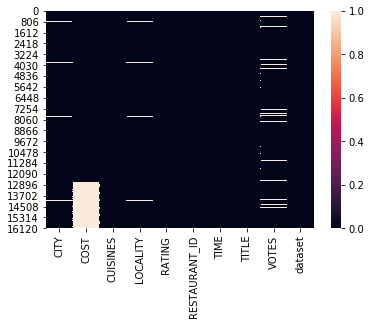

In [11]:
#heatmap for null values
sns.heatmap(df.isnull())

In [12]:
# check for duplicates
print('sum of duplicated values{}\n'.format(df.duplicated().sum()))

sum of duplicated values26



In [13]:
#drop duplictes values
df.drop_duplicates(inplace=True)
df.shape

(16895, 10)

In [14]:
#number of unique value in each features
for col in df.columns.values:
    print("number of unique valuse of {} : {}".format(col, df[col].nunique()))

number of unique valuse of CITY : 450
number of unique valuse of COST : 86
number of unique valuse of CUISINES : 5183
number of unique valuse of LOCALITY : 1636
number of unique valuse of RATING : 32
number of unique valuse of RESTAURANT_ID : 15574
number of unique valuse of TIME : 3295
number of unique valuse of TITLE : 123
number of unique valuse of VOTES : 2075
number of unique valuse of dataset : 2


In [15]:
# Check if ? is present
for col in df:
    print(f"? in {col}: {df[(df[col] == '?')].any().sum()}")


? in CITY: 0
? in COST: 0
? in CUISINES: 0
? in LOCALITY: 0
? in RATING: 0
? in RESTAURANT_ID: 0
? in TIME: 0
? in TITLE: 0
? in VOTES: 0
? in dataset: 0


In [16]:
#Separate categorical and numberical columns
cat_col = df.dtypes[df.dtypes == 'object']
num_col = df.dtypes[df.dtypes != 'object']

In [17]:
for col in list(cat_col.index):
    print(f"--------------------{col.title()}-------------------------")
    total= df[col].value_counts()
    percent = df[col].value_counts() / df.shape[0]
    df1 = pd.concat([total,percent],keys = ['total','percent'],axis = 1)
    print(df1)
    print('\n')

--------------------City-------------------------
              total   percent
Chennai        2854  0.168926
Bangalore      2831  0.167564
Hyderabad      2458  0.145487
Mumbai         2301  0.136194
New Delhi      1750  0.103581
...             ...       ...
Sriram nagar      1  0.000059
Mogappair         1  0.000059
Malad East        1  0.000059
B-1 Stage         1  0.000059
Kolathur          1  0.000059

[450 rows x 2 columns]


--------------------Cuisines-------------------------
                                          total   percent
North Indian                                714  0.042261
North Indian, Chinese                       713  0.042202
South Indian                                706  0.041788
Fast Food                                   364  0.021545
Chinese                                     226  0.013377
...                                         ...       ...
Continental, Burger, BBQ                      1  0.000059
Healthy Food, Italian, Salad                  

In [18]:
#Lets describe the objects fields
df.describe(include=['object', 'bool'])

,CITY,CUISINES,LOCALITY,RATING,TIME,TITLE,VOTES,dataset
count,16748,16895,16767,16891,16895,16895,15293,16895
unique,450,5183,1636,32,3295,123,2075,2
top,Chennai,North Indian,Gachibowli,3.9,11am – 11pm (Mon-Sun),QUICK BITES,44 votes,train
freq,2854,714,216,1638,1861,5627,92,12665


Looks like all the categorical variables have lot of levels associated with them. We may have to group them and engineer new features based on certain keywords and rules.

In [19]:
#Lets describe the dataset
df.describe()

,COST,RESTAURANT_ID
count,12665.000000,16895.000000
mean,655.400790,7765.922344
std,627.389831,4494.226728
min,20.000000,0.000000
25%,300.000000,3869.500000
50%,500.000000,7750.000000
75%,800.000000,11672.000000
max,14000.000000,15573.000000


# Feature Generation

In [20]:
#----------------------------finding the max values in a single cell -----------#
# Analysing Titles 

titles = list(df['TITLE'])

# Finding Maximum number of titles mentioned in a single cell
maxim = 1
for i in titles :
    if len(i.split(',')) > maxim:
         maxim = len(i.split(','))
         
print("\n\nMaximum Titles in a Cell : ", maxim)    

all_titles = []

for i in titles :
    if len(i.split(',')) == 1:
         all_titles.append(i.split(',')[0].strip().upper())
    else :
        for it in range(len(i.split(','))):
            all_titles.append(i.split(',')[it].strip().upper())

print("\n\nNumber of Unique Titles : ", len(pd.Series(all_titles).unique()))
print("\n\nUnique Titles:\n", pd.Series(all_titles).unique())

all_titles = list(pd.Series(all_titles).unique())

# Analysing cuisines 

cuisines = list(df['CUISINES'])

maxim = 1
for i in cuisines :
    if len(i.split(',')) > maxim:
         maxim = len(i.split(','))
         
print("\n\nMaximum cuisines in a Cell : ", maxim)    

all_cuisines = []

for i in cuisines :
    if len(i.split(',')) == 1:
         #print(i.split(',')[0])
         all_cuisines.append(i.split(',')[0].strip().upper())
    else :
        for it in range(len(i.split(','))):
            #print(i.split(',')[it])
            all_cuisines.append(i.split(',')[it].strip().upper())

print("\n\nNumber of Unique Cuisines : ", len(pd.Series(all_cuisines).unique()))
print("\n\nUnique Cuisines:\n", pd.Series(all_cuisines).unique())

all_cuisines = list(pd.Series(all_cuisines).unique())

# Analysing CITY

all_cities = list(df['CITY'])

for i in range(len(all_cities)):
    if type(all_cities[i]) == float:
        all_cities[i] = 'NOT AVAILABLE'
    all_cities[i] = all_cities[i].strip().upper()
        
print("\n\nNumber of Unique cities (Including NOT AVAILABLE): ", len(pd.Series(all_cities).unique()))
print("\n\nUnique Cities:\n", pd.Series(all_cities).unique())
 
all_cities = list(pd.Series(all_cities).unique())


# Cleaning LOCALITY

all_localities = list(df['LOCALITY'])

for i in range(len(all_localities)):
    if type(all_localities[i]) == float:
        all_localities[i] = 'NOT AVAILABLE'
    all_localities[i] = all_localities[i].strip().upper()
        
print("\n\nNumber of Unique Localities (Including NOT AVAILABLE) : ", len(pd.Series(all_localities).unique()))
print("\n\nUnique Localities:\n", pd.Series(all_localities).unique())

all_localities = list(pd.Series(all_localities).unique())



Maximum Titles in a Cell :  2


Number of Unique Titles :  25


Unique Titles:
 ['CASUAL DINING' 'BAR' 'QUICK BITES' 'DESSERT PARLOR' 'CAFÉ'
 'MICROBREWERY' 'BEVERAGE SHOP' 'IRANI CAFE' 'BAKERY' 'NONE' 'PUB'
 'FINE DINING' 'SWEET SHOP' 'LOUNGE' 'FOOD COURT' 'FOOD TRUCK' 'MESS'
 'KIOSK' 'CLUB' 'CONFECTIONERY' 'DHABA' 'MEAT SHOP' 'COCKTAIL BAR'
 'PAAN SHOP' 'BHOJANALYA']


Maximum cuisines in a Cell :  8


Number of Unique Cuisines :  130


Unique Cuisines:
 ['MALWANI' 'GOAN' 'NORTH INDIAN' 'ASIAN' 'MODERN INDIAN' 'JAPANESE'
 'CHINESE' 'BIRYANI' 'HYDERABADI' 'TIBETAN' 'DESSERTS' 'SEAFOOD' 'CAFE'
 'PIZZA' 'BURGER' 'BAR FOOD' 'SOUTH INDIAN' 'FAST FOOD' 'BEVERAGES'
 'ARABIAN' 'MUGHLAI' 'MAHARASHTRIAN' 'PARSI' 'THAI' 'BAKERY' 'MOMOS'
 'CONTINENTAL' 'EUROPEAN' 'ROLLS' 'ANDHRA' 'ITALIAN' 'BBQ' 'FINGER FOOD'
 'TEA' 'AMERICAN' 'HEALTHY FOOD' 'COFFEE' 'INDONESIAN' 'KOREAN' 'NEPALESE'
 'ICE CREAM' 'MEXICAN' 'KERALA' 'INDIAN' 'MITHAI' 'STREET FOOD'
 'MALAYSIAN' 'VIETNAMESE' 'IRANIAN' 'KEBAB' 'JUI

Number of Unique Localities (Including NOT AVAILABLE) :  1611


Unique Localities:
 ['DOMBIVALI EAST' 'RAMAPURAM' 'SALIGRAMAM' ... 'OFF CARTER ROAD'
 'SRM BACK GATE' 'PERRY CROSS ROAD']


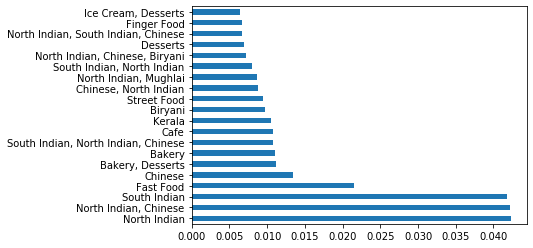

In [22]:
##------------------------CUISINES---------------------------------------------------------------------##
#Lets plot the Counts of CUISINES
df['CUISINES'].value_counts(normalize=True)[:20].plot(kind='barh')

In [23]:
#Extracting CUISINES_1,CUISINES_2,CUISINES_3,CUISINES_4,CUISINES_5,CUISINES_6,CUISINES_7,CUISINES_8 from CUISINES by splitting them with ','.
df['CUISINES_1']=df['CUISINES'].str.split(',').str[0]
df['CUISINES_2']=df['CUISINES'].str.split(',').str[1]
df['CUISINES_3']=df['CUISINES'].str.split(',').str[2]
df['CUISINES_4']=df['CUISINES'].str.split(',').str[3]
df['CUISINES_5']=df['CUISINES'].str.split(',').str[4]
df['CUISINES_6']=df['CUISINES'].str.split(',').str[5]
df['CUISINES_7']=df['CUISINES'].str.split(',').str[6]
df['CUISINES_8']=df['CUISINES'].str.split(',').str[7]
df

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES,dataset,CUISINES_1,CUISINES_2,CUISINES_3,CUISINES_4,CUISINES_5,CUISINES_6,CUISINES_7,CUISINES_8
0,Thane,1200.0,"Malwani, Goan, North Indian",Dombivali East,3.6,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",CASUAL DINING,49 votes,train,Malwani,Goan,North Indian,NaN,NaN,NaN,NaN,NaN
1,Chennai,1500.0,"Asian, Modern Indian, Japanese",Ramapuram,4.2,13198,6pm – 11pm (Mon-Sun),"CASUAL DINING,BAR",30 votes,train,Asian,Modern Indian,Japanese,NaN,NaN,NaN,NaN,NaN
2,Chennai,800.0,"North Indian, Chinese, Biryani, Hyderabadi",Saligramam,3.8,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,221 votes,train,North Indian,Chinese,Biryani,Hyderabadi,NaN,NaN,NaN,NaN
3,Mumbai,800.0,"Tibetan, Chinese",Bandra West,4.1,6346,11:30am – 1am (Mon-Sun),QUICK BITES,24 votes,train,Tibetan,Chinese,NaN,NaN,NaN,NaN,NaN,NaN
4,Mumbai,300.0,Desserts,Lower Parel,3.8,15387,11am – 1am (Mon-Sun),DESSERT PARLOR,165 votes,train,Desserts,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16916,New Delhi,NaN,"North Indian, Mughlai, Chinese",Punjabi Bagh,3.9,9057,11:30am – 11:30pm (Mon-Sun),CASUAL DINING,287 votes,test,North Indian,Mughlai,Chinese,NaN,NaN,NaN,NaN,NaN
16917,Bangalore,NaN,"Biryani, North Indian, Sandwich, Salad, Wraps",HSR Layout,4.3,1247,11am – 1am (Mon-Sun),None,469 votes,test,Biryani,North Indian,Sandwich,Salad,Wraps,NaN,NaN,NaN
16918,Faridabad,NaN,"Continental, North Indian",Sector 86,3.7,8617,9:30am – 10:30pm (Mon-Sun),QUICK BITES,53 votes,test,Continental,North Indian,NaN,NaN,NaN,NaN,NaN,NaN
16919,Kochi,NaN,"Rolls, Beverages",Kochi,-,6485,"11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",QUICK BITES,NaN,test,Rolls,Beverages,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#Replacing NaN values with None
df['CUISINES_1'].fillna("None",inplace=True)
df['CUISINES_2'].fillna("None",inplace=True)
df['CUISINES_3'].fillna("None",inplace=True)
df['CUISINES_4'].fillna("None",inplace=True)
df['CUISINES_5'].fillna("None",inplace=True)
df['CUISINES_6'].fillna("None",inplace=True)
df['CUISINES_7'].fillna("None",inplace=True)
df['CUISINES_8'].fillna("None",inplace=True)
df.isnull().sum()

CITY              147
COST             4230
CUISINES            0
LOCALITY          128
RATING              4
RESTAURANT_ID       0
TIME                0
TITLE               0
VOTES            1602
dataset             0
CUISINES_1          0
CUISINES_2          0
CUISINES_3          0
CUISINES_4          0
CUISINES_5          0
CUISINES_6          0
CUISINES_7          0
CUISINES_8          0
dtype: int64

In [25]:
##-----------------------------------------Rating---------------------------------------------------##
#Replacing "NEW" and '-' with nan values and then convert it into float datatype..
df['RATING'] = df['RATING'].replace("NEW",np.nan)
df['RATING'] = df['RATING'].replace("-",np.nan)
df.RATING = df.RATING.astype('float')
#Replacing nan values with mean()
df.RATING.fillna(df.RATING.mean(), inplace=True)
#checking null values in Rating
df.RATING.isnull().sum()

0

In [26]:
##-------------------------------------------------TIME---------------------------------------------------##
#in time field transforming string into lowercase and after that removed space..
df.TIME = df.TIME.str.lower()
df.TIME = df.TIME.str.replace(" ","")
df.TIME = df.TIME.str.replace("–",'-')
df

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES,dataset,CUISINES_1,CUISINES_2,CUISINES_3,CUISINES_4,CUISINES_5,CUISINES_6,CUISINES_7,CUISINES_8
0,Thane,1200.0,"Malwani, Goan, North Indian",Dombivali East,3.600000,9438,"11am-4pm,7:30pm-11:30pm(mon-sun)",CASUAL DINING,49 votes,train,Malwani,Goan,North Indian,None,None,None,None,None
1,Chennai,1500.0,"Asian, Modern Indian, Japanese",Ramapuram,4.200000,13198,6pm-11pm(mon-sun),"CASUAL DINING,BAR",30 votes,train,Asian,Modern Indian,Japanese,None,None,None,None,None
2,Chennai,800.0,"North Indian, Chinese, Biryani, Hyderabadi",Saligramam,3.800000,10915,"11am-3:30pm,7pm-11pm(mon-sun)",CASUAL DINING,221 votes,train,North Indian,Chinese,Biryani,Hyderabadi,None,None,None,None
3,Mumbai,800.0,"Tibetan, Chinese",Bandra West,4.100000,6346,11:30am-1am(mon-sun),QUICK BITES,24 votes,train,Tibetan,Chinese,None,None,None,None,None,None
4,Mumbai,300.0,Desserts,Lower Parel,3.800000,15387,11am-1am(mon-sun),DESSERT PARLOR,165 votes,train,Desserts,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16916,New Delhi,NaN,"North Indian, Mughlai, Chinese",Punjabi Bagh,3.900000,9057,11:30am-11:30pm(mon-sun),CASUAL DINING,287 votes,test,North Indian,Mughlai,Chinese,None,None,None,None,None
16917,Bangalore,NaN,"Biryani, North Indian, Sandwich, Salad, Wraps",HSR Layout,4.300000,1247,11am-1am(mon-sun),None,469 votes,test,Biryani,North Indian,Sandwich,Salad,Wraps,None,None,None
16918,Faridabad,NaN,"Continental, North Indian",Sector 86,3.700000,8617,9:30am-10:30pm(mon-sun),QUICK BITES,53 votes,test,Continental,North Indian,None,None,None,None,None,None
16919,Kochi,NaN,"Rolls, Beverages",Kochi,3.784293,6485,"11am-11:30pm(mon,tue,wed,thu,sat,sun),3pm...",QUICK BITES,NaN,test,Rolls,Beverages,None,None,None,None,None,None


In [27]:
# Now in this step i have made a separate ['all_days'] feature 
df['all_days'] = 0
df.loc[df.TIME.str.contains(r'(\(mon\-sun\))'),'all_days'] = 1
df.TIME = df.TIME.str.replace("\(mon-sun\)","")
df

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES,dataset,CUISINES_1,CUISINES_2,CUISINES_3,CUISINES_4,CUISINES_5,CUISINES_6,CUISINES_7,CUISINES_8,all_days
0,Thane,1200.0,"Malwani, Goan, North Indian",Dombivali East,3.600000,9438,"11am-4pm,7:30pm-11:30pm",CASUAL DINING,49 votes,train,Malwani,Goan,North Indian,None,None,None,None,None,1
1,Chennai,1500.0,"Asian, Modern Indian, Japanese",Ramapuram,4.200000,13198,6pm-11pm,"CASUAL DINING,BAR",30 votes,train,Asian,Modern Indian,Japanese,None,None,None,None,None,1
2,Chennai,800.0,"North Indian, Chinese, Biryani, Hyderabadi",Saligramam,3.800000,10915,"11am-3:30pm,7pm-11pm",CASUAL DINING,221 votes,train,North Indian,Chinese,Biryani,Hyderabadi,None,None,None,None,1
3,Mumbai,800.0,"Tibetan, Chinese",Bandra West,4.100000,6346,11:30am-1am,QUICK BITES,24 votes,train,Tibetan,Chinese,None,None,None,None,None,None,1
4,Mumbai,300.0,Desserts,Lower Parel,3.800000,15387,11am-1am,DESSERT PARLOR,165 votes,train,Desserts,None,None,None,None,None,None,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16916,New Delhi,NaN,"North Indian, Mughlai, Chinese",Punjabi Bagh,3.900000,9057,11:30am-11:30pm,CASUAL DINING,287 votes,test,North Indian,Mughlai,Chinese,None,None,None,None,None,1
16917,Bangalore,NaN,"Biryani, North Indian, Sandwich, Salad, Wraps",HSR Layout,4.300000,1247,11am-1am,None,469 votes,test,Biryani,North Indian,Sandwich,Salad,Wraps,None,None,None,1
16918,Faridabad,NaN,"Continental, North Indian",Sector 86,3.700000,8617,9:30am-10:30pm,QUICK BITES,53 votes,test,Continental,North Indian,None,None,None,None,None,None,1
16919,Kochi,NaN,"Rolls, Beverages",Kochi,3.784293,6485,"11am-11:30pm(mon,tue,wed,thu,sat,sun),3pm...",QUICK BITES,NaN,test,Rolls,Beverages,None,None,None,None,None,None,0


In [28]:
# Now in this step i have made a separate ['closed_weekend'] feature
df['closed_weekend'] = 0
df.loc[df.TIME.str.contains("closed\(sun\)"),"closed_weekend"] = 1
df.loc[df.TIME.str.contains("closed\(sat\)"),"closed_weekend"] = 1
df.TIME = df.TIME.str.replace("closed\(sun\)","")
df.TIME = df.TIME.str.replace("closed\(sat\)","")
df

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES,dataset,CUISINES_1,CUISINES_2,CUISINES_3,CUISINES_4,CUISINES_5,CUISINES_6,CUISINES_7,CUISINES_8,all_days,closed_weekend
0,Thane,1200.0,"Malwani, Goan, North Indian",Dombivali East,3.600000,9438,"11am-4pm,7:30pm-11:30pm",CASUAL DINING,49 votes,train,Malwani,Goan,North Indian,None,None,None,None,None,1,0
1,Chennai,1500.0,"Asian, Modern Indian, Japanese",Ramapuram,4.200000,13198,6pm-11pm,"CASUAL DINING,BAR",30 votes,train,Asian,Modern Indian,Japanese,None,None,None,None,None,1,0
2,Chennai,800.0,"North Indian, Chinese, Biryani, Hyderabadi",Saligramam,3.800000,10915,"11am-3:30pm,7pm-11pm",CASUAL DINING,221 votes,train,North Indian,Chinese,Biryani,Hyderabadi,None,None,None,None,1,0
3,Mumbai,800.0,"Tibetan, Chinese",Bandra West,4.100000,6346,11:30am-1am,QUICK BITES,24 votes,train,Tibetan,Chinese,None,None,None,None,None,None,1,0
4,Mumbai,300.0,Desserts,Lower Parel,3.800000,15387,11am-1am,DESSERT PARLOR,165 votes,train,Desserts,None,None,None,None,None,None,None,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16916,New Delhi,NaN,"North Indian, Mughlai, Chinese",Punjabi Bagh,3.900000,9057,11:30am-11:30pm,CASUAL DINING,287 votes,test,North Indian,Mughlai,Chinese,None,None,None,None,None,1,0
16917,Bangalore,NaN,"Biryani, North Indian, Sandwich, Salad, Wraps",HSR Layout,4.300000,1247,11am-1am,None,469 votes,test,Biryani,North Indian,Sandwich,Salad,Wraps,None,None,None,1,0
16918,Faridabad,NaN,"Continental, North Indian",Sector 86,3.700000,8617,9:30am-10:30pm,QUICK BITES,53 votes,test,Continental,North Indian,None,None,None,None,None,None,1,0
16919,Kochi,NaN,"Rolls, Beverages",Kochi,3.784293,6485,"11am-11:30pm(mon,tue,wed,thu,sat,sun),3pm...",QUICK BITES,NaN,test,Rolls,Beverages,None,None,None,None,None,None,0,0


In [29]:
# Now in this step i have made a separate ['closed_weekday'] feature
df['closed_weekday'] = 0
df.loc[df.TIME.str.contains("closed\(mon\)"),"closed_weekday"] = 1
df.loc[df.TIME.str.contains("closed\(tue\)"),"closed_weekday"] = 1
df.loc[df.TIME.str.contains("closed\(wed\)"),"closed_weekday"] = 1
df.TIME = df.TIME.str.replace("closed\(mon\)","")
df.TIME = df.TIME.str.replace("closed\(tue\)","")
df.TIME = df.TIME.str.replace("closed\(wed\)","")
df

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES,dataset,...,CUISINES_2,CUISINES_3,CUISINES_4,CUISINES_5,CUISINES_6,CUISINES_7,CUISINES_8,all_days,closed_weekend,closed_weekday
0,Thane,1200.0,"Malwani, Goan, North Indian",Dombivali East,3.600000,9438,"11am-4pm,7:30pm-11:30pm",CASUAL DINING,49 votes,train,...,Goan,North Indian,None,None,None,None,None,1,0,0
1,Chennai,1500.0,"Asian, Modern Indian, Japanese",Ramapuram,4.200000,13198,6pm-11pm,"CASUAL DINING,BAR",30 votes,train,...,Modern Indian,Japanese,None,None,None,None,None,1,0,0
2,Chennai,800.0,"North Indian, Chinese, Biryani, Hyderabadi",Saligramam,3.800000,10915,"11am-3:30pm,7pm-11pm",CASUAL DINING,221 votes,train,...,Chinese,Biryani,Hyderabadi,None,None,None,None,1,0,0
3,Mumbai,800.0,"Tibetan, Chinese",Bandra West,4.100000,6346,11:30am-1am,QUICK BITES,24 votes,train,...,Chinese,None,None,None,None,None,None,1,0,0
4,Mumbai,300.0,Desserts,Lower Parel,3.800000,15387,11am-1am,DESSERT PARLOR,165 votes,train,...,None,None,None,None,None,None,None,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16916,New Delhi,NaN,"North Indian, Mughlai, Chinese",Punjabi Bagh,3.900000,9057,11:30am-11:30pm,CASUAL DINING,287 votes,test,...,Mughlai,Chinese,None,None,None,None,None,1,0,0
16917,Bangalore,NaN,"Biryani, North Indian, Sandwich, Salad, Wraps",HSR Layout,4.300000,1247,11am-1am,None,469 votes,test,...,North Indian,Sandwich,Salad,Wraps,None,None,None,1,0,0
16918,Faridabad,NaN,"Continental, North Indian",Sector 86,3.700000,8617,9:30am-10:30pm,QUICK BITES,53 votes,test,...,North Indian,None,None,None,None,None,None,1,0,0
16919,Kochi,NaN,"Rolls, Beverages",Kochi,3.784293,6485,"11am-11:30pm(mon,tue,wed,thu,sat,sun),3pm...",QUICK BITES,NaN,test,...,Beverages,None,None,None,None,None,None,0,0,0


In [30]:
# In this i have replaced "(" with  " " in Time...
# splitting with " " and splitting with ","
 # Replacing '-' with " " and ',' with " "
df.TIME = df.TIME.str.replace("(",' ')
df.TIME = df.TIME.str.strip()
df.TIME = df.TIME.str.split(" ").str.get(0).str.lstrip(',')
df.TIME = df.TIME.str.replace("-"," ")
df.TIME = df.TIME.str.replace(","," ")
df

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES,dataset,...,CUISINES_2,CUISINES_3,CUISINES_4,CUISINES_5,CUISINES_6,CUISINES_7,CUISINES_8,all_days,closed_weekend,closed_weekday
0,Thane,1200.0,"Malwani, Goan, North Indian",Dombivali East,3.600000,9438,11am 4pm 7:30pm 11:30pm,CASUAL DINING,49 votes,train,...,Goan,North Indian,None,None,None,None,None,1,0,0
1,Chennai,1500.0,"Asian, Modern Indian, Japanese",Ramapuram,4.200000,13198,6pm 11pm,"CASUAL DINING,BAR",30 votes,train,...,Modern Indian,Japanese,None,None,None,None,None,1,0,0
2,Chennai,800.0,"North Indian, Chinese, Biryani, Hyderabadi",Saligramam,3.800000,10915,11am 3:30pm 7pm 11pm,CASUAL DINING,221 votes,train,...,Chinese,Biryani,Hyderabadi,None,None,None,None,1,0,0
3,Mumbai,800.0,"Tibetan, Chinese",Bandra West,4.100000,6346,11:30am 1am,QUICK BITES,24 votes,train,...,Chinese,None,None,None,None,None,None,1,0,0
4,Mumbai,300.0,Desserts,Lower Parel,3.800000,15387,11am 1am,DESSERT PARLOR,165 votes,train,...,None,None,None,None,None,None,None,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16916,New Delhi,NaN,"North Indian, Mughlai, Chinese",Punjabi Bagh,3.900000,9057,11:30am 11:30pm,CASUAL DINING,287 votes,test,...,Mughlai,Chinese,None,None,None,None,None,1,0,0
16917,Bangalore,NaN,"Biryani, North Indian, Sandwich, Salad, Wraps",HSR Layout,4.300000,1247,11am 1am,None,469 votes,test,...,North Indian,Sandwich,Salad,Wraps,None,None,None,1,0,0
16918,Faridabad,NaN,"Continental, North Indian",Sector 86,3.700000,8617,9:30am 10:30pm,QUICK BITES,53 votes,test,...,North Indian,None,None,None,None,None,None,1,0,0
16919,Kochi,NaN,"Rolls, Beverages",Kochi,3.784293,6485,11am 11:30pm,QUICK BITES,NaN,test,...,Beverages,None,None,None,None,None,None,0,0,0


In [31]:
#          Replacing ('12noon','12midnight','24hours','24hours','notavailable','mon','closed',) with 
#                       ('12:01','00:01','00:01 23:59','11am 11pm','11am 11pm','9am 9pm')
df.TIME = df.TIME.str.replace("12noon","12:01")
df.TIME = df.TIME.str.replace("12midnight","00:01")
df.TIME[df.TIME.str.contains("24hours")] = "00:01 23:59"
df.TIME[df.TIME.str.contains("notavailable")] = "11am 11pm"
df.TIME[df.TIME.str.contains("mon")] = "11am 11pm"
df.TIME[df.TIME.str.contains("closed")] = "9am 9am"
df.TIME = df.TIME.str.replace(".","")
df.TIME[df.TIME == ""] = "11am 11pm"
df

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES,dataset,...,CUISINES_2,CUISINES_3,CUISINES_4,CUISINES_5,CUISINES_6,CUISINES_7,CUISINES_8,all_days,closed_weekend,closed_weekday
0,Thane,1200.0,"Malwani, Goan, North Indian",Dombivali East,3.600000,9438,11am 4pm 7:30pm 11:30pm,CASUAL DINING,49 votes,train,...,Goan,North Indian,None,None,None,None,None,1,0,0
1,Chennai,1500.0,"Asian, Modern Indian, Japanese",Ramapuram,4.200000,13198,6pm 11pm,"CASUAL DINING,BAR",30 votes,train,...,Modern Indian,Japanese,None,None,None,None,None,1,0,0
2,Chennai,800.0,"North Indian, Chinese, Biryani, Hyderabadi",Saligramam,3.800000,10915,11am 3:30pm 7pm 11pm,CASUAL DINING,221 votes,train,...,Chinese,Biryani,Hyderabadi,None,None,None,None,1,0,0
3,Mumbai,800.0,"Tibetan, Chinese",Bandra West,4.100000,6346,11:30am 1am,QUICK BITES,24 votes,train,...,Chinese,None,None,None,None,None,None,1,0,0
4,Mumbai,300.0,Desserts,Lower Parel,3.800000,15387,11am 1am,DESSERT PARLOR,165 votes,train,...,None,None,None,None,None,None,None,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16916,New Delhi,NaN,"North Indian, Mughlai, Chinese",Punjabi Bagh,3.900000,9057,11:30am 11:30pm,CASUAL DINING,287 votes,test,...,Mughlai,Chinese,None,None,None,None,None,1,0,0
16917,Bangalore,NaN,"Biryani, North Indian, Sandwich, Salad, Wraps",HSR Layout,4.300000,1247,11am 1am,None,469 votes,test,...,North Indian,Sandwich,Salad,Wraps,None,None,None,1,0,0
16918,Faridabad,NaN,"Continental, North Indian",Sector 86,3.700000,8617,9:30am 10:30pm,QUICK BITES,53 votes,test,...,North Indian,None,None,None,None,None,None,1,0,0
16919,Kochi,NaN,"Rolls, Beverages",Kochi,3.784293,6485,11am 11:30pm,QUICK BITES,NaN,test,...,Beverages,None,None,None,None,None,None,0,0,0


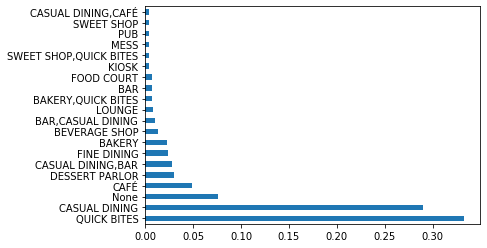

In [32]:
##---------------------------------Title--------------------------------------##
#Lets plot the Counts of Title
df['TITLE'].value_counts(normalize=True)[:20].plot(kind='barh')

In [33]:
# Splitting TITLE with "," and storing them in new features ['TITLE_1'], ['TITLE_2']
df['TITLE_1']=df['TITLE'].str.split(',').str[0]
df['TITLE_2']=df['TITLE'].str.split(',').str[1]
df

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES,dataset,...,CUISINES_4,CUISINES_5,CUISINES_6,CUISINES_7,CUISINES_8,all_days,closed_weekend,closed_weekday,TITLE_1,TITLE_2
0,Thane,1200.0,"Malwani, Goan, North Indian",Dombivali East,3.600000,9438,11am 4pm 7:30pm 11:30pm,CASUAL DINING,49 votes,train,...,None,None,None,None,None,1,0,0,CASUAL DINING,NaN
1,Chennai,1500.0,"Asian, Modern Indian, Japanese",Ramapuram,4.200000,13198,6pm 11pm,"CASUAL DINING,BAR",30 votes,train,...,None,None,None,None,None,1,0,0,CASUAL DINING,BAR
2,Chennai,800.0,"North Indian, Chinese, Biryani, Hyderabadi",Saligramam,3.800000,10915,11am 3:30pm 7pm 11pm,CASUAL DINING,221 votes,train,...,Hyderabadi,None,None,None,None,1,0,0,CASUAL DINING,NaN
3,Mumbai,800.0,"Tibetan, Chinese",Bandra West,4.100000,6346,11:30am 1am,QUICK BITES,24 votes,train,...,None,None,None,None,None,1,0,0,QUICK BITES,NaN
4,Mumbai,300.0,Desserts,Lower Parel,3.800000,15387,11am 1am,DESSERT PARLOR,165 votes,train,...,None,None,None,None,None,1,0,0,DESSERT PARLOR,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16916,New Delhi,NaN,"North Indian, Mughlai, Chinese",Punjabi Bagh,3.900000,9057,11:30am 11:30pm,CASUAL DINING,287 votes,test,...,None,None,None,None,None,1,0,0,CASUAL DINING,NaN
16917,Bangalore,NaN,"Biryani, North Indian, Sandwich, Salad, Wraps",HSR Layout,4.300000,1247,11am 1am,None,469 votes,test,...,Salad,Wraps,None,None,None,1,0,0,None,NaN
16918,Faridabad,NaN,"Continental, North Indian",Sector 86,3.700000,8617,9:30am 10:30pm,QUICK BITES,53 votes,test,...,None,None,None,None,None,1,0,0,QUICK BITES,NaN
16919,Kochi,NaN,"Rolls, Beverages",Kochi,3.784293,6485,11am 11:30pm,QUICK BITES,NaN,test,...,None,None,None,None,None,0,0,0,QUICK BITES,NaN


In [34]:
#replacing nan values with None
df['TITLE_1'].fillna("None",inplace=True)
df['TITLE_2'].fillna("None",inplace=True)
#calculating missing values
df.isnull().sum()

CITY               147
COST              4230
CUISINES             0
LOCALITY           128
RATING               0
RESTAURANT_ID        0
TIME                 0
TITLE                0
VOTES             1602
dataset              0
CUISINES_1           0
CUISINES_2           0
CUISINES_3           0
CUISINES_4           0
CUISINES_5           0
CUISINES_6           0
CUISINES_7           0
CUISINES_8           0
all_days             0
closed_weekend       0
closed_weekday       0
TITLE_1              0
TITLE_2              0
dtype: int64

In [35]:
##-------------------------Votes------------------------------------------##
#Stripping votes in VOTES and then convert it into float type
df['VOTES']=df['VOTES'].str.strip('votes').astype(float)
#Replacing missing values with mean
df.VOTES.fillna(df.VOTES.mean(), inplace=True)
#checking null values
df.VOTES.isnull().sum()

0

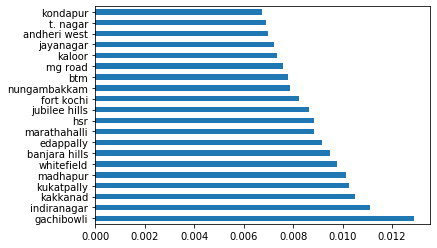

In [36]:
##-------------------LOCALITY------------------------------#### 
#Covert LOCALITY into lower case
df['LOCALITY'] = df['LOCALITY'].str.lower()
#Lets plot the Counts of LOCALITY

df['LOCALITY'].value_counts(normalize=True)[:20].plot(kind='barh')
df['LOCALITY'] = df['LOCALITY'].str.replace('.','')


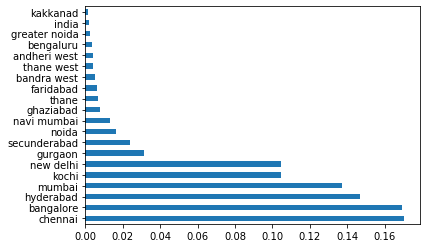

In [37]:
##---------------------------------------City-------------------------------------------------------##
#coverting City column into lower case
df['CITY'] = df['CITY'].str.lower()
#Lets plot the Counts of CITY

df['CITY'].value_counts(normalize=True)[:20].plot(kind='barh')

In [38]:
# Filling up null values of 'CITY' and 'LOCALITY' with the "missing" value
df["CITY"].fillna("missing",inplace=True)
df["LOCALITY"].fillna("missing",inplace=True)

In [39]:
#checking null values
df.isnull().sum()

CITY                 0
COST              4230
CUISINES             0
LOCALITY             0
RATING               0
RESTAURANT_ID        0
TIME                 0
TITLE                0
VOTES                0
dataset              0
CUISINES_1           0
CUISINES_2           0
CUISINES_3           0
CUISINES_4           0
CUISINES_5           0
CUISINES_6           0
CUISINES_7           0
CUISINES_8           0
all_days             0
closed_weekend       0
closed_weekday       0
TITLE_1              0
TITLE_2              0
dtype: int64

In [40]:
# Dropping unwanted Features
df.drop(['RESTAURANT_ID','CUISINES','TIME','TITLE'],axis=1,inplace=True)
df.columns

Index(['CITY', 'COST', 'LOCALITY', 'RATING', 'VOTES', 'dataset', 'CUISINES_1',
       'CUISINES_2', 'CUISINES_3', 'CUISINES_4', 'CUISINES_5', 'CUISINES_6',
       'CUISINES_7', 'CUISINES_8', 'all_days', 'closed_weekend',
       'closed_weekday', 'TITLE_1', 'TITLE_2'],
      dtype='object')

# Univarient Analysis


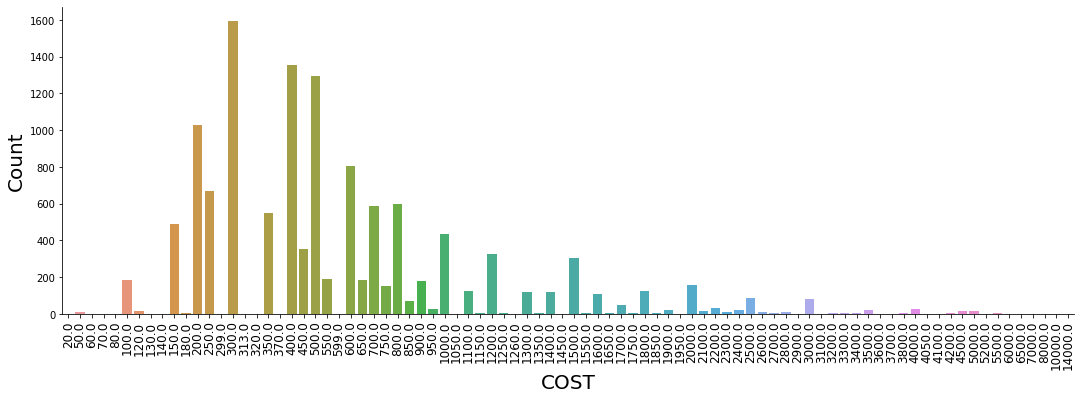

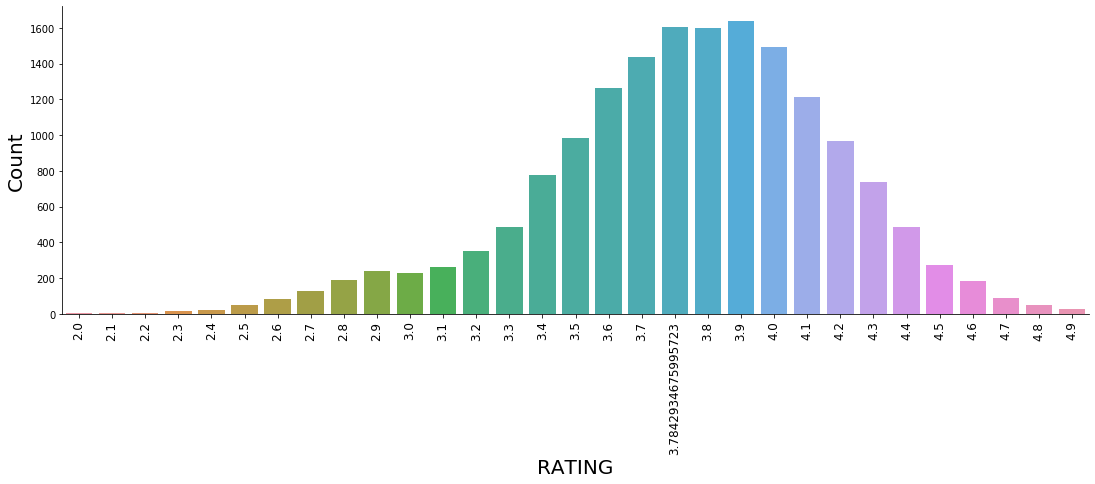

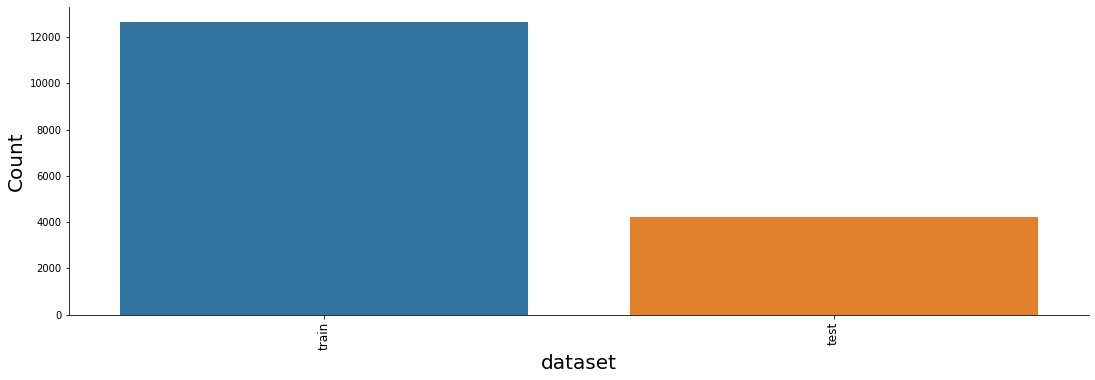

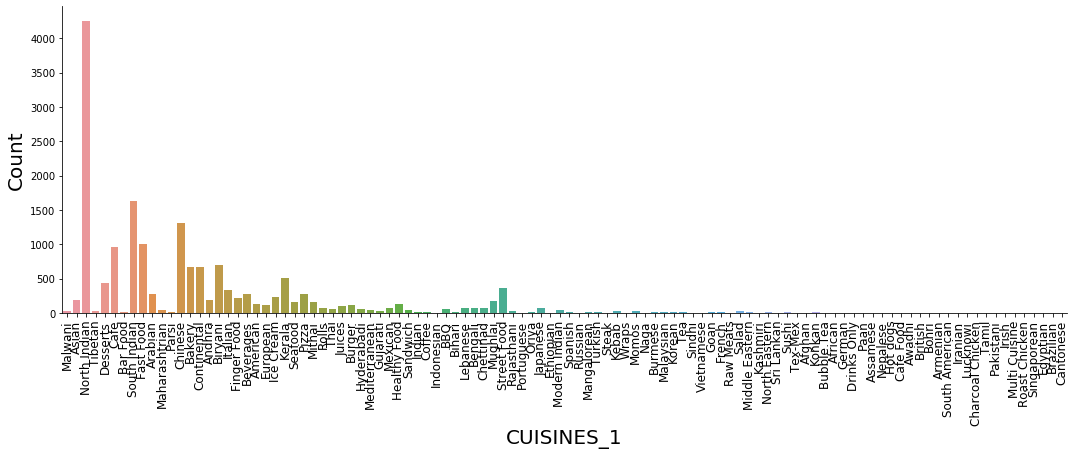

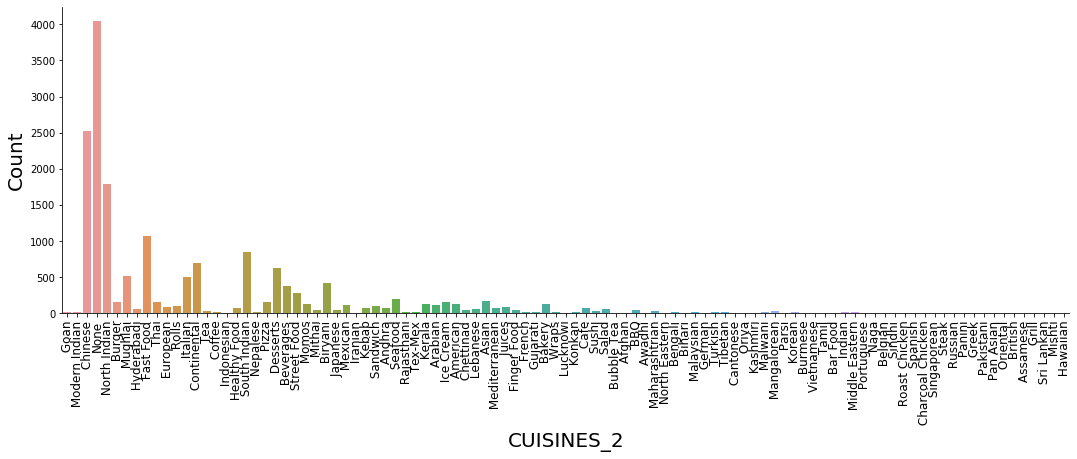

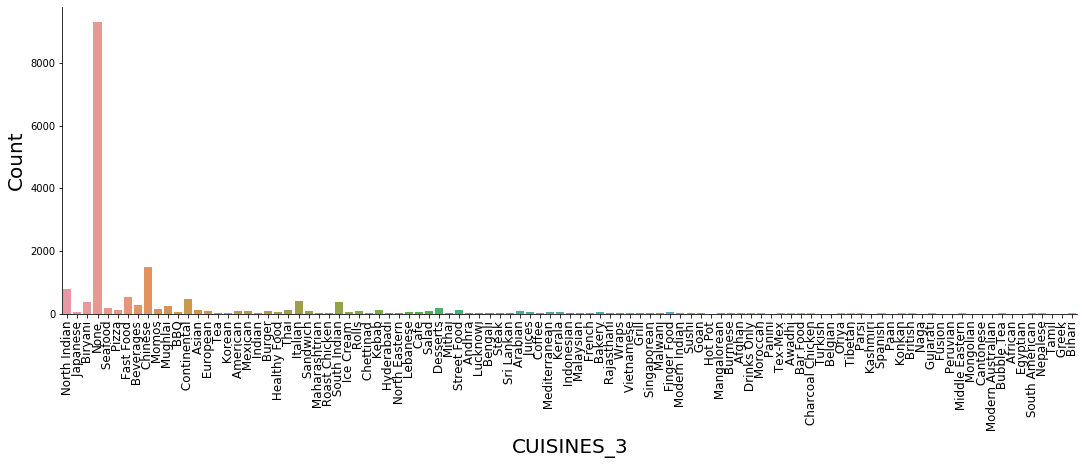

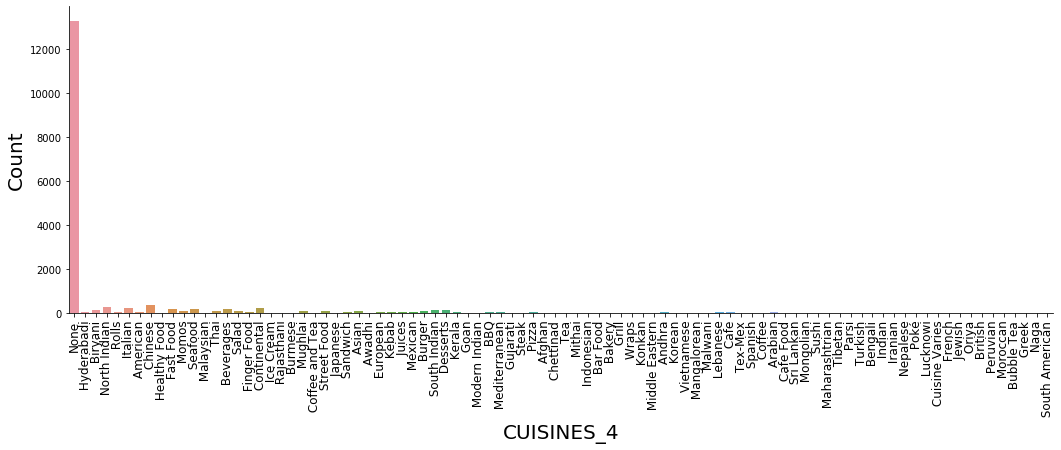

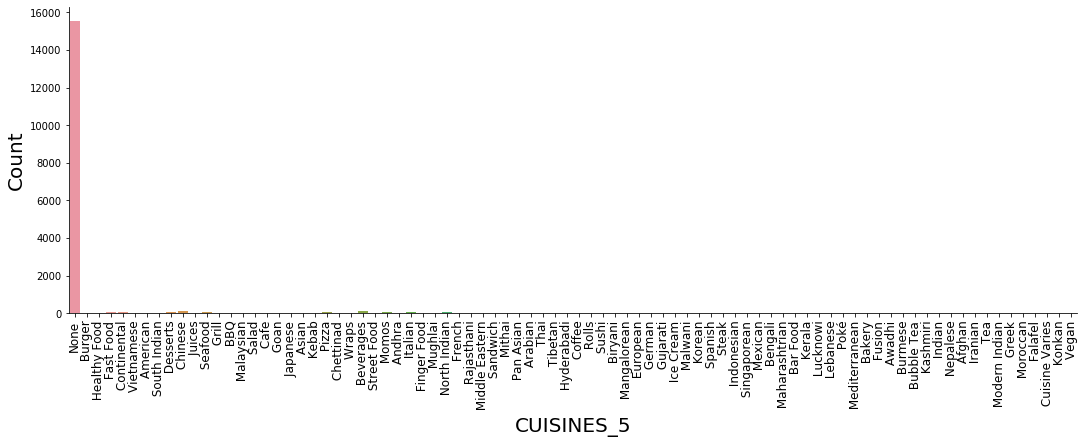

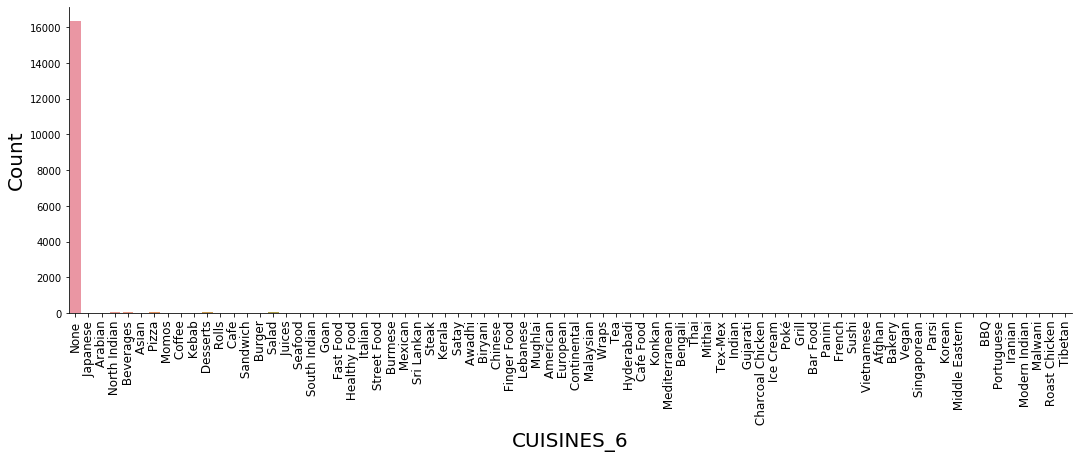

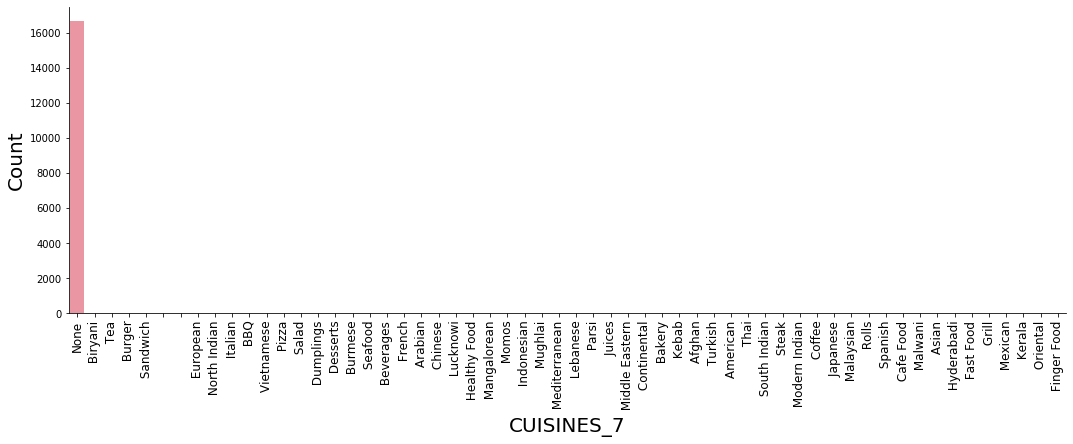

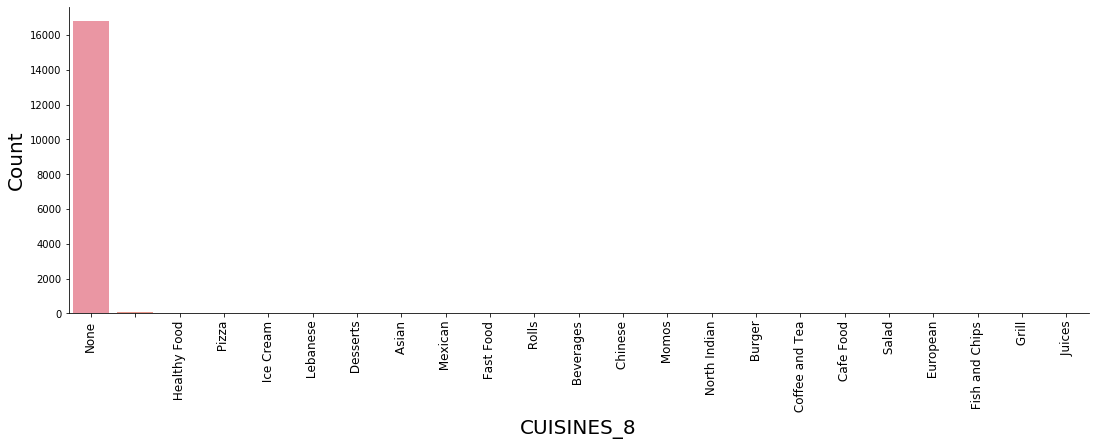

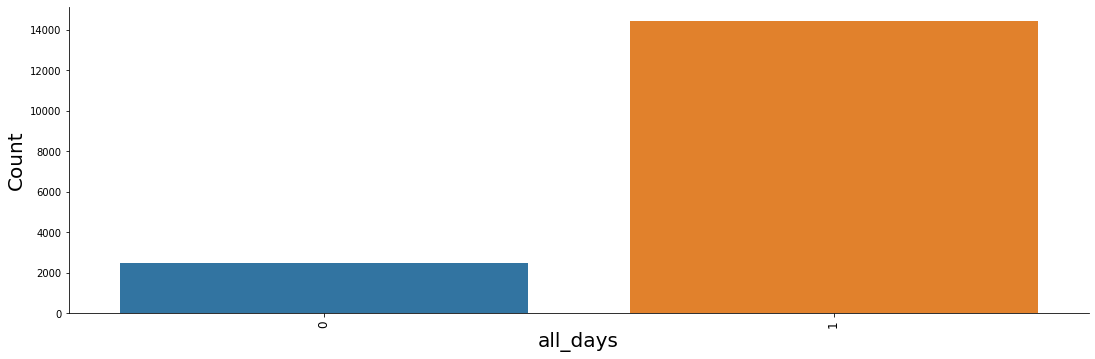

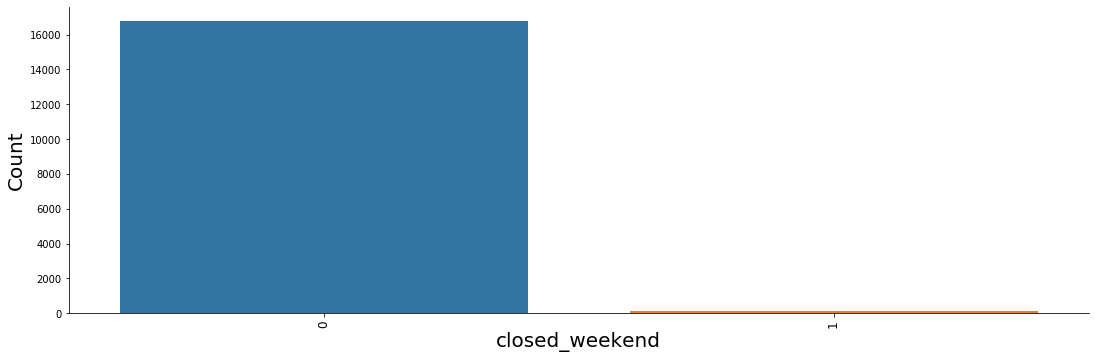

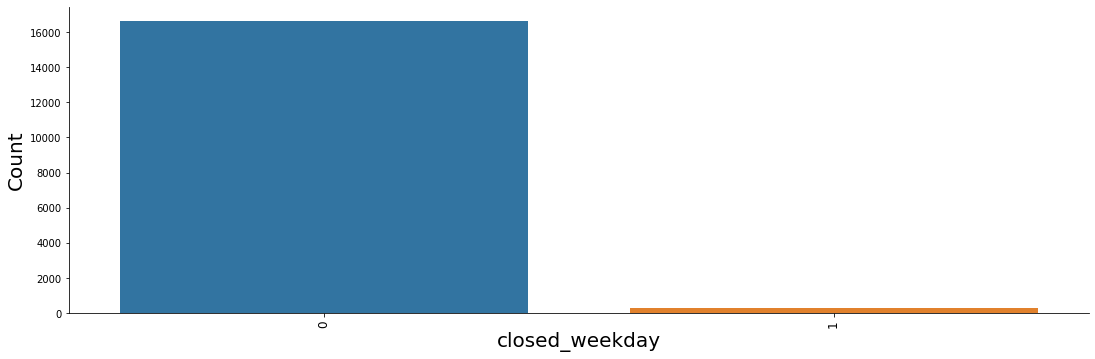

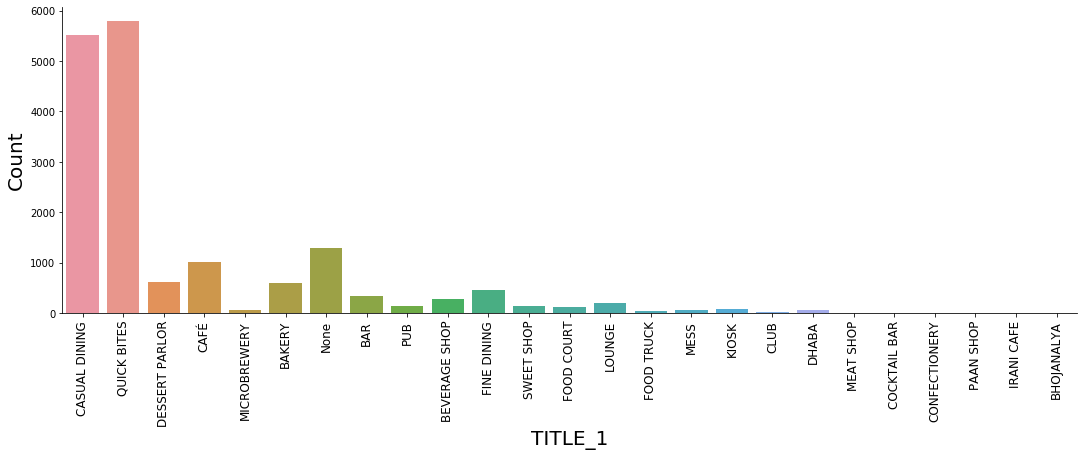

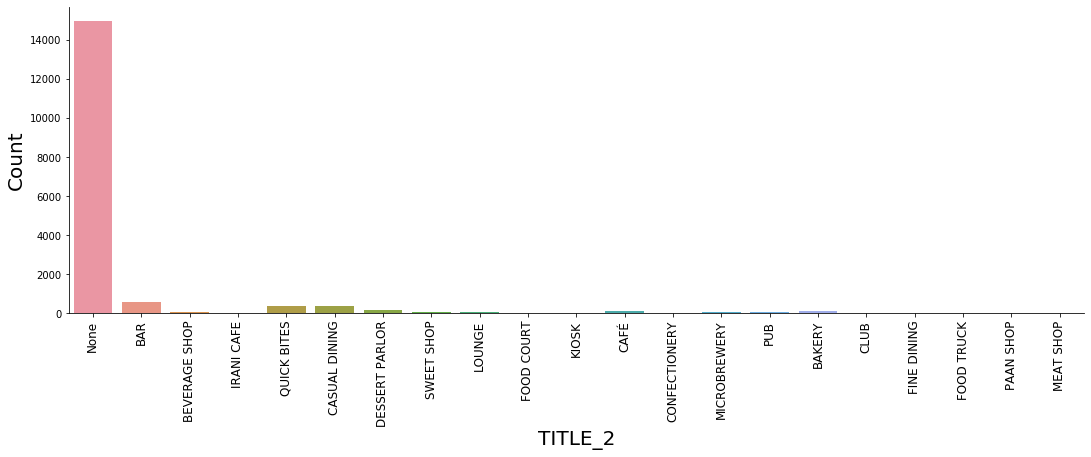

In [41]:
# For loop to plot counting Graph of Different Features.....
for i in df.drop(['CITY','LOCALITY','VOTES'],axis=1).columns.values:
    sns.catplot(x=i,
                data=df,
                kind='count',
                height=5,
                aspect=3,
               )
    plt.xticks(rotation=90,fontsize=12)
    plt.xticks(fontsize=12)
    plt.ylabel('Count',fontsize=20)
    plt.xlabel(i,fontsize=20)

##### Information from the Graph:

1) Rs 300 cost is the maximum occuring value out of the rest.
2) 3.9 Rating is the rating given by the people to the restaurant maximum number of times.
3) Maximum number of people likes North Indian Cuisine followed by chinese and then South indian.
4) Restaurants opened all days are more.
5) Restaurants closed on weekends are very less.
6) Restaurants closed on weekdays are also very less.
7) Restaurants having title Quick Bites are more followed by Casual Dining.

COST                 AxesSubplot(0.125,0.772143;0.168478x0.107857)
RATING            AxesSubplot(0.327174,0.772143;0.168478x0.107857)
VOTES             AxesSubplot(0.529348,0.772143;0.168478x0.107857)
all_days          AxesSubplot(0.731522,0.772143;0.168478x0.107857)
closed_weekend       AxesSubplot(0.125,0.642714;0.168478x0.107857)
closed_weekday    AxesSubplot(0.327174,0.642714;0.168478x0.107857)
dtype: object

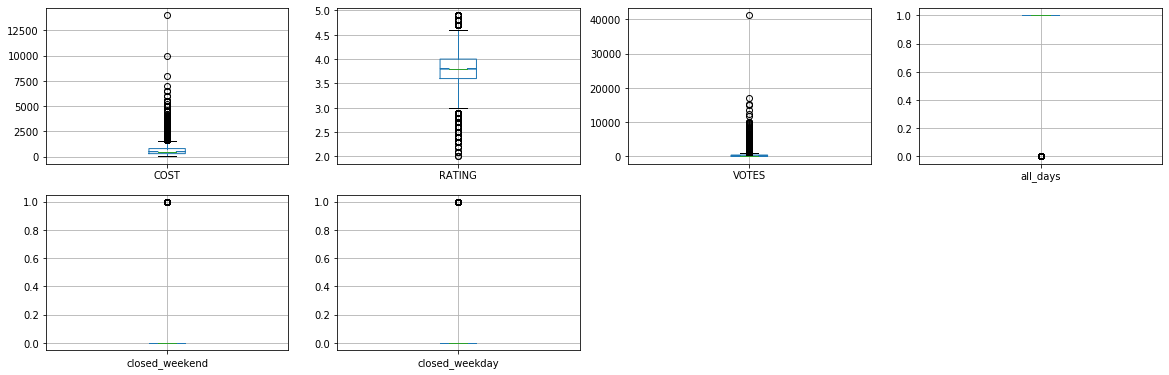

In [42]:
# Plotting the boxplot in order to check few statistical values and outliers
df.plot(kind='box', subplots=True, layout=(6,4),figsize=(20,20),grid=True,notch=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024DB83A8588>,
      dtype=object)

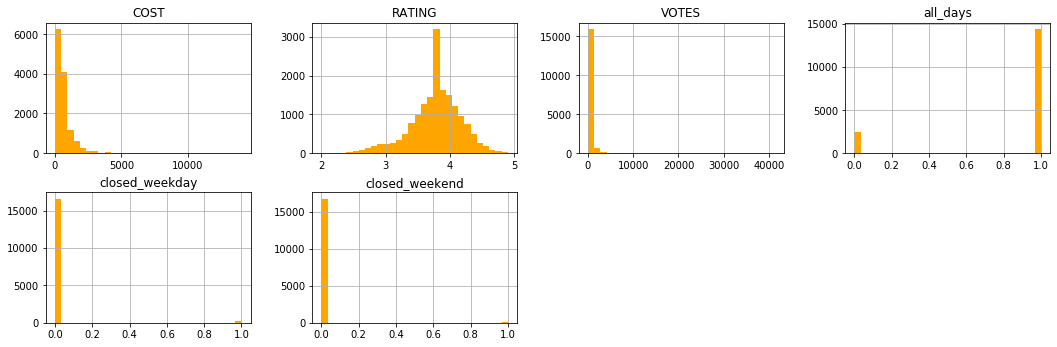

In [43]:
#plotting histograms for checking normal distribution
df.hist(figsize=(18,18),grid=True,layout=(6,4),bins=30,color='orange')

# Bivarient  Analysis


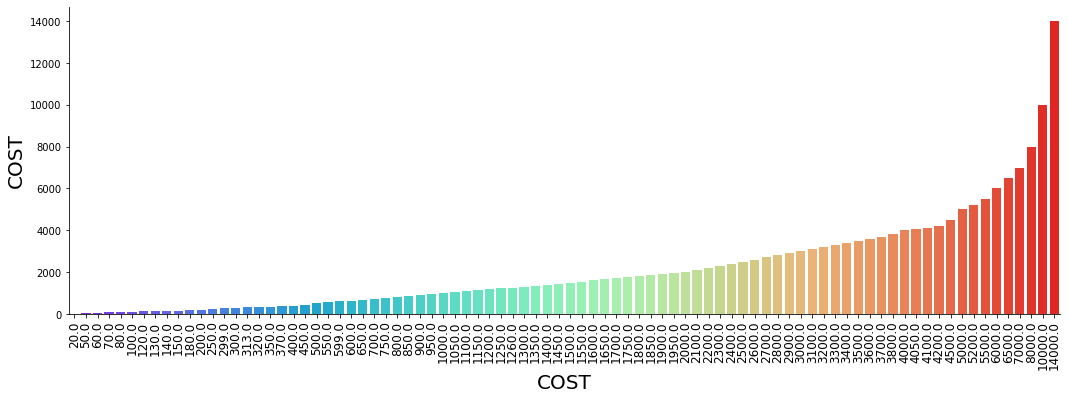

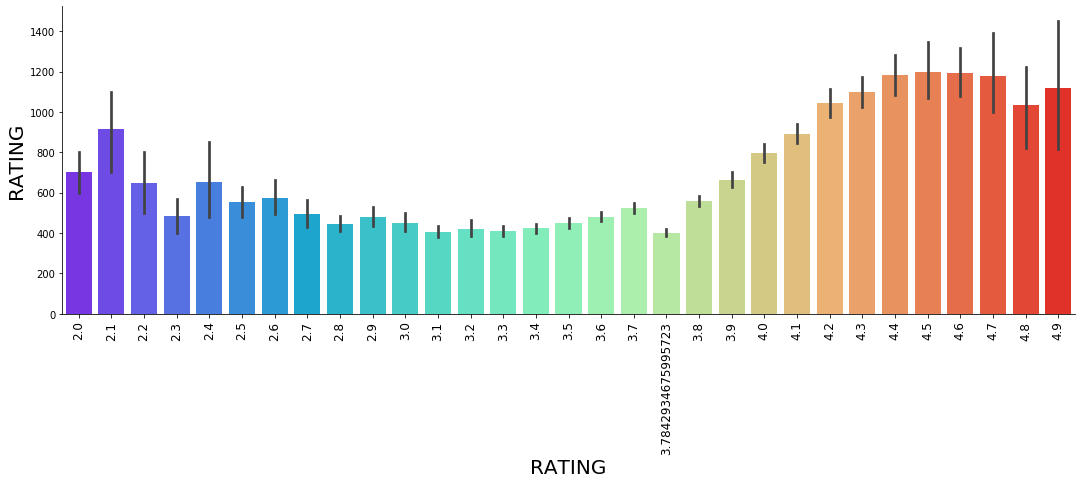

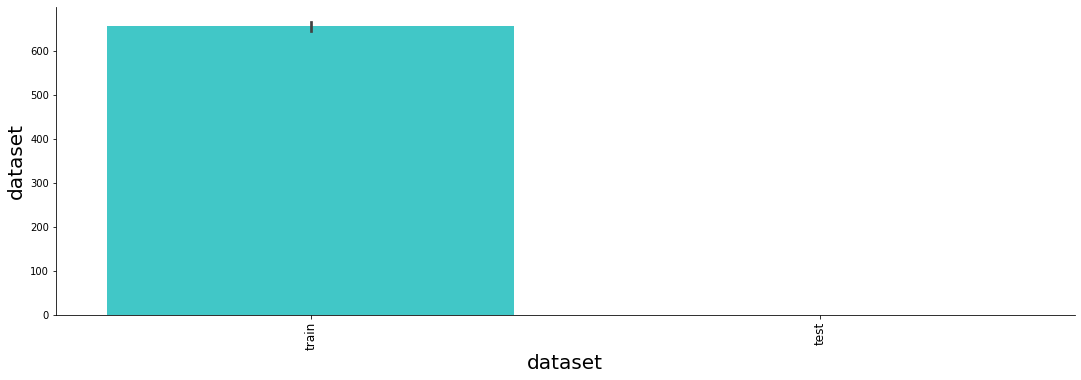

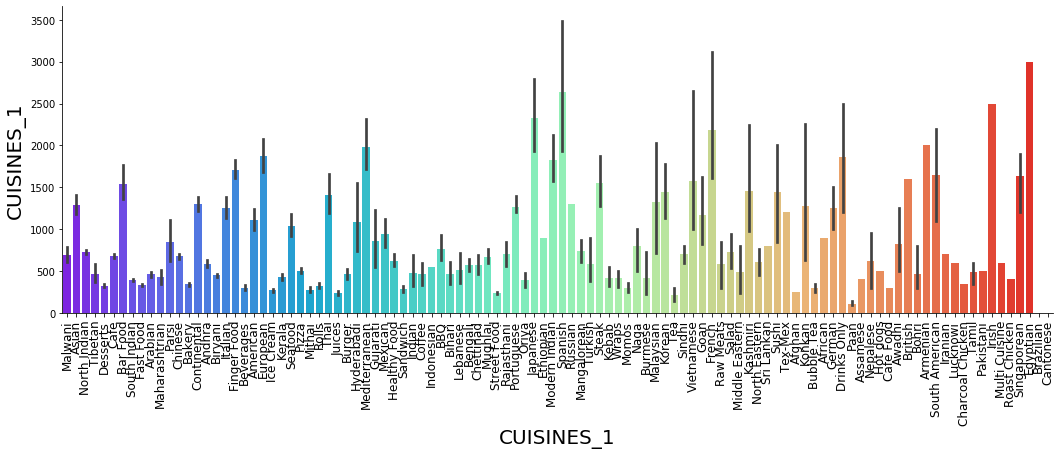

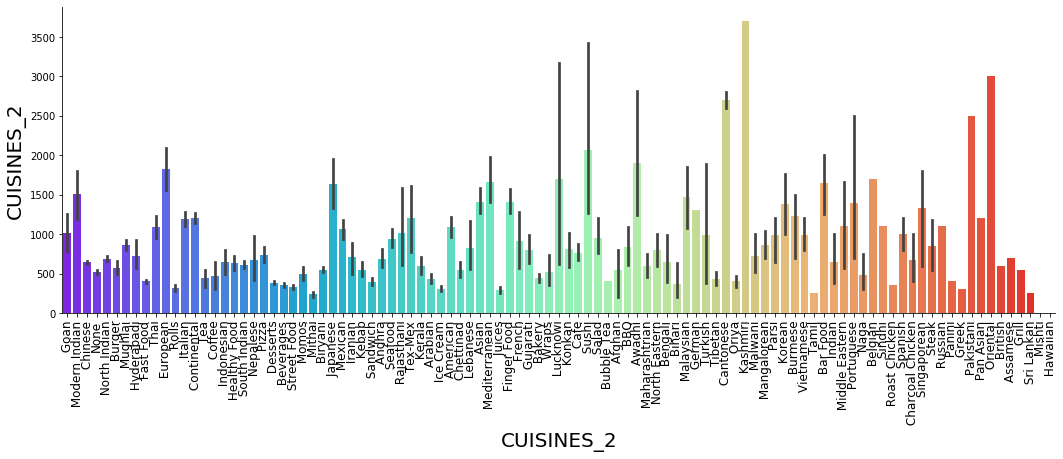

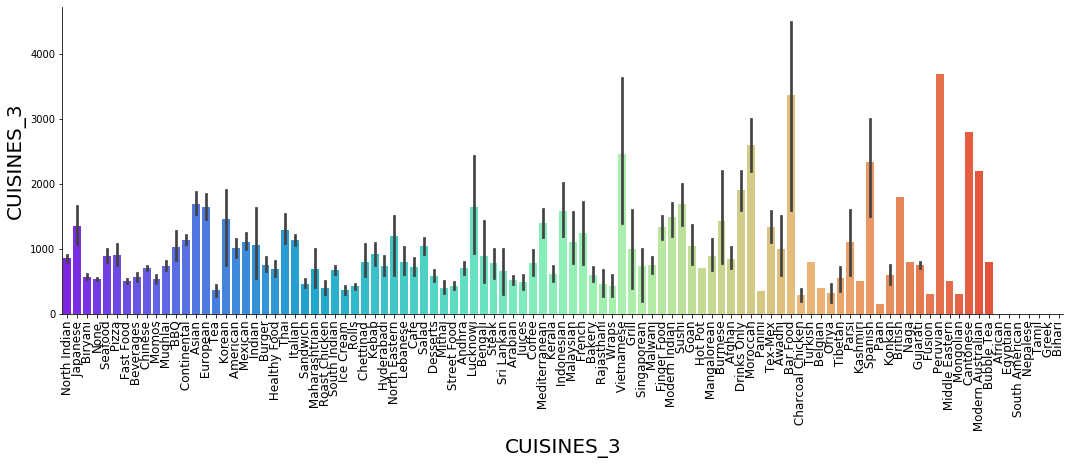

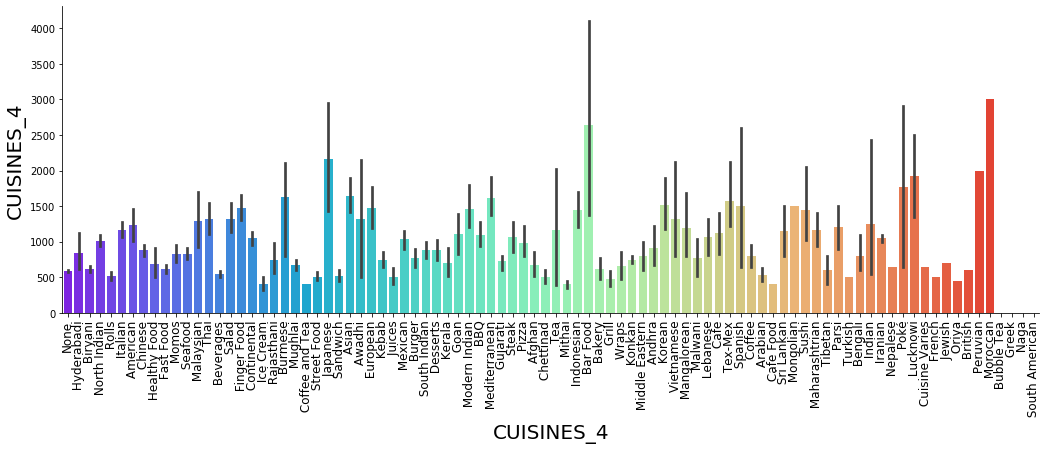

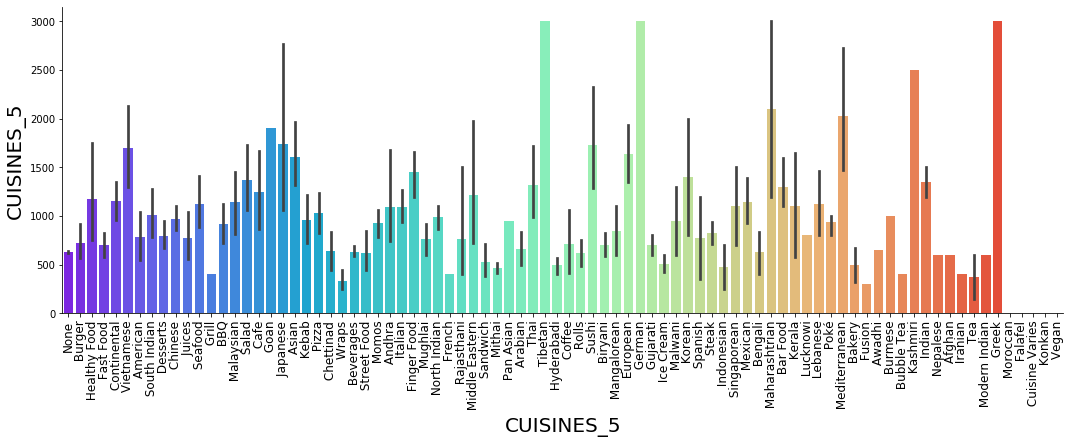

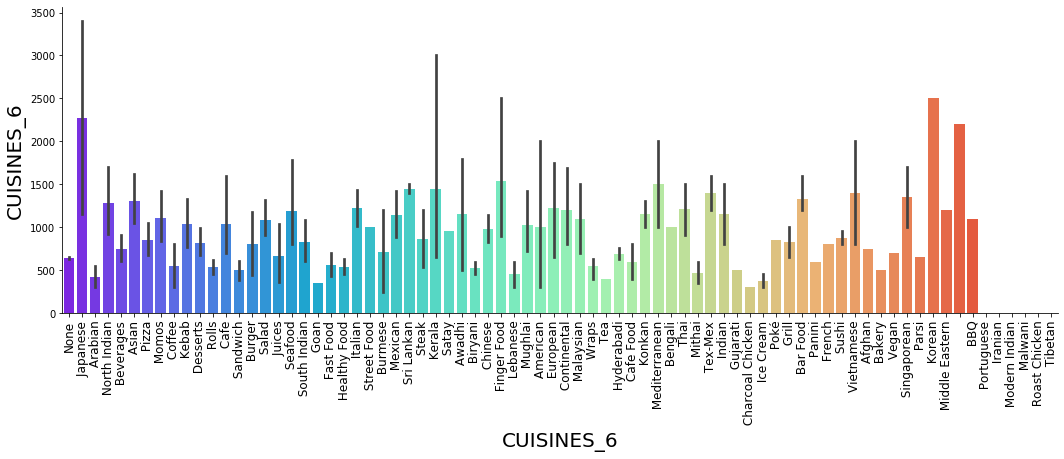

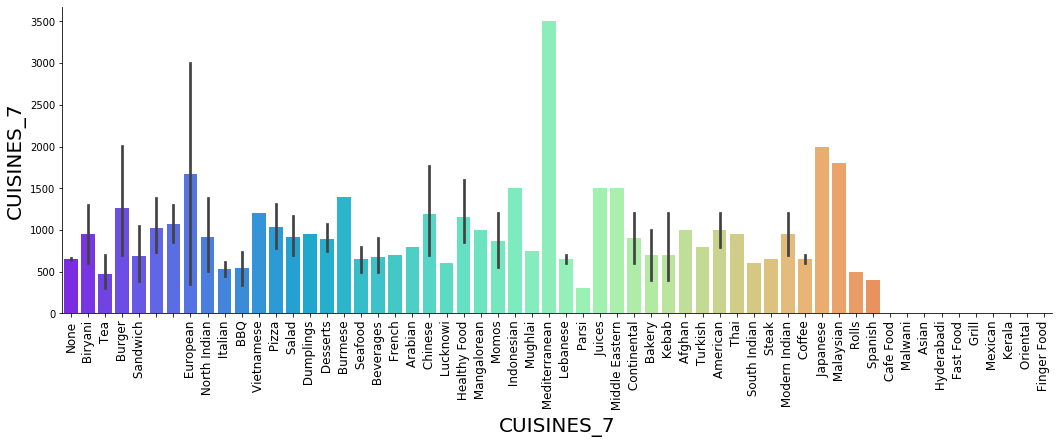

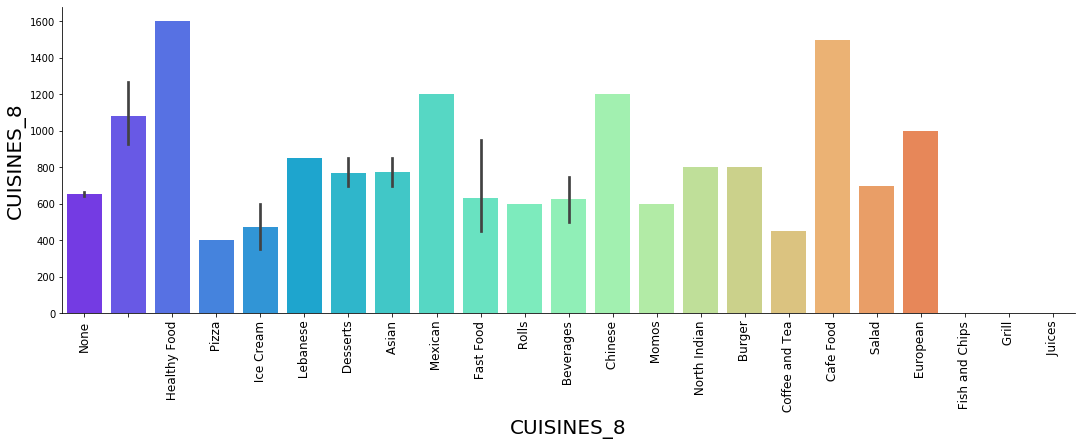

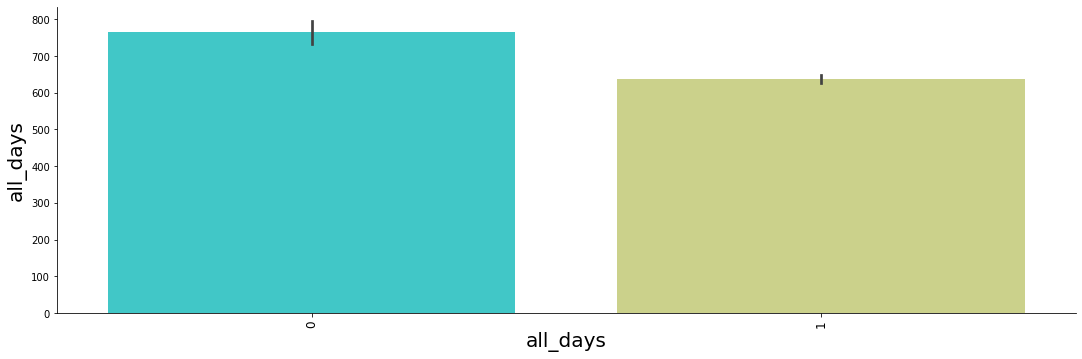

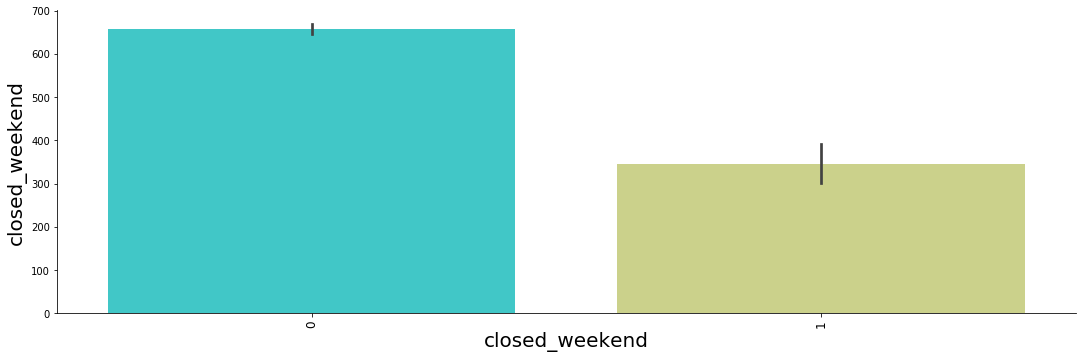

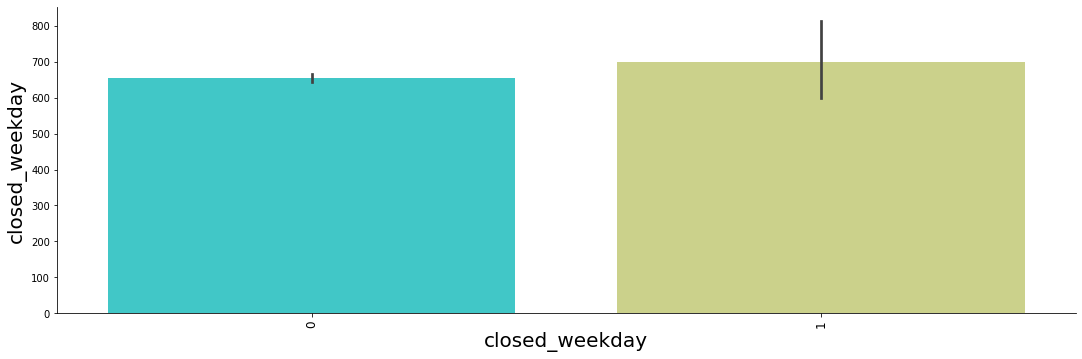

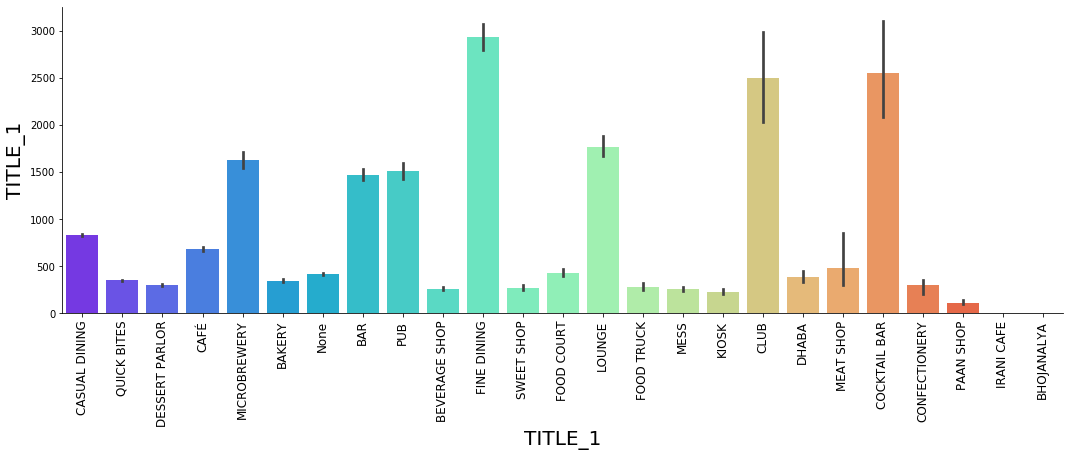

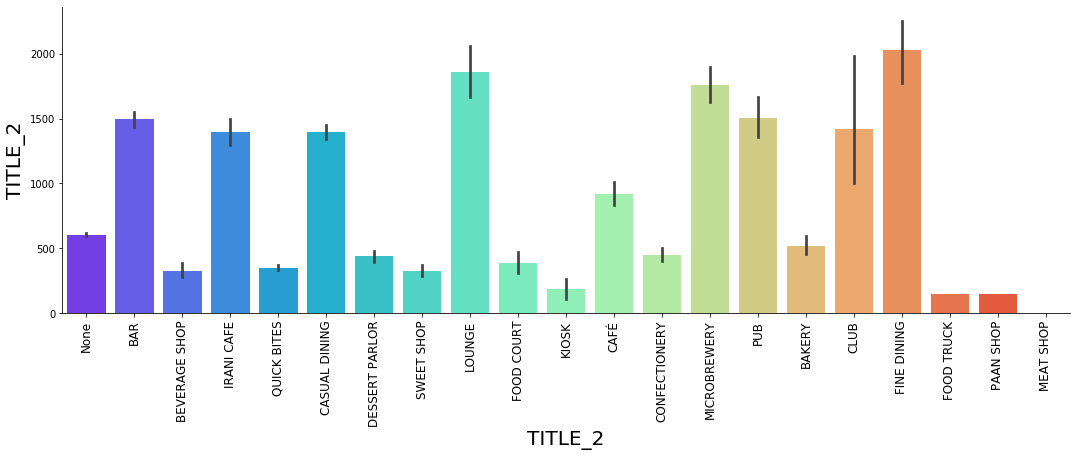

In [44]:
#Separate categorical and numberical columns
obj_col = df.dtypes[df.dtypes == 'object']
num_col = df.dtypes[df.dtypes != 'object']
# for loop to plot graphs between COST and different features....
for i in df.drop(['CITY','LOCALITY','VOTES'],axis=1).columns.values:
    sns.catplot(x=i,
                data=df,
                y='COST',
                kind='bar',
                palette='rainbow',
                height=5,
                aspect=3,
               )
    plt.xticks(rotation=90,fontsize=12)
    plt.xticks(fontsize=12)
    plt.ylabel(i,fontsize=20)
    plt.xlabel(i,fontsize=20)

1) More the rating more the cost.
2) Restaurant with Fine dining title has more cost.
3) Kashmiri, Bar food, Lucknowi, sushi, Vietnamese, peruvian,Japanese,Mediterranean, europeon these cuisines have cost more than Rs 3000.

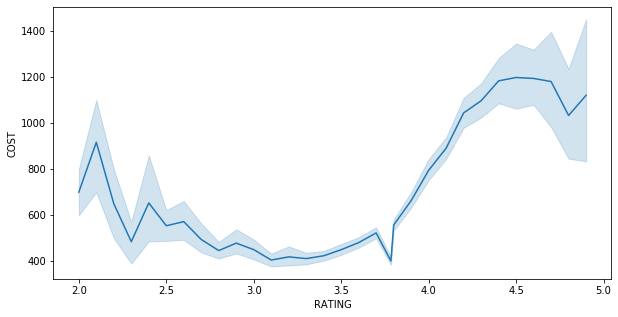

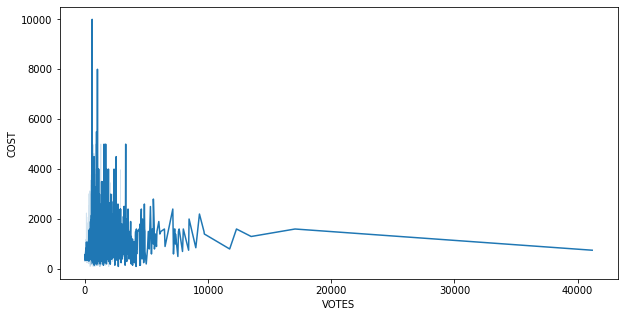

In [45]:
# Graph between Rating, Votes and cost....
for i in ['RATING' ,'VOTES']:
    plt.subplots(figsize=(10,5))
    sns.lineplot(x=i,y='COST',data=df)

1) As the Rating increases the cost of the Food in the restaurant increases.
2)As votes increases the cost of the food in restaurant increases.

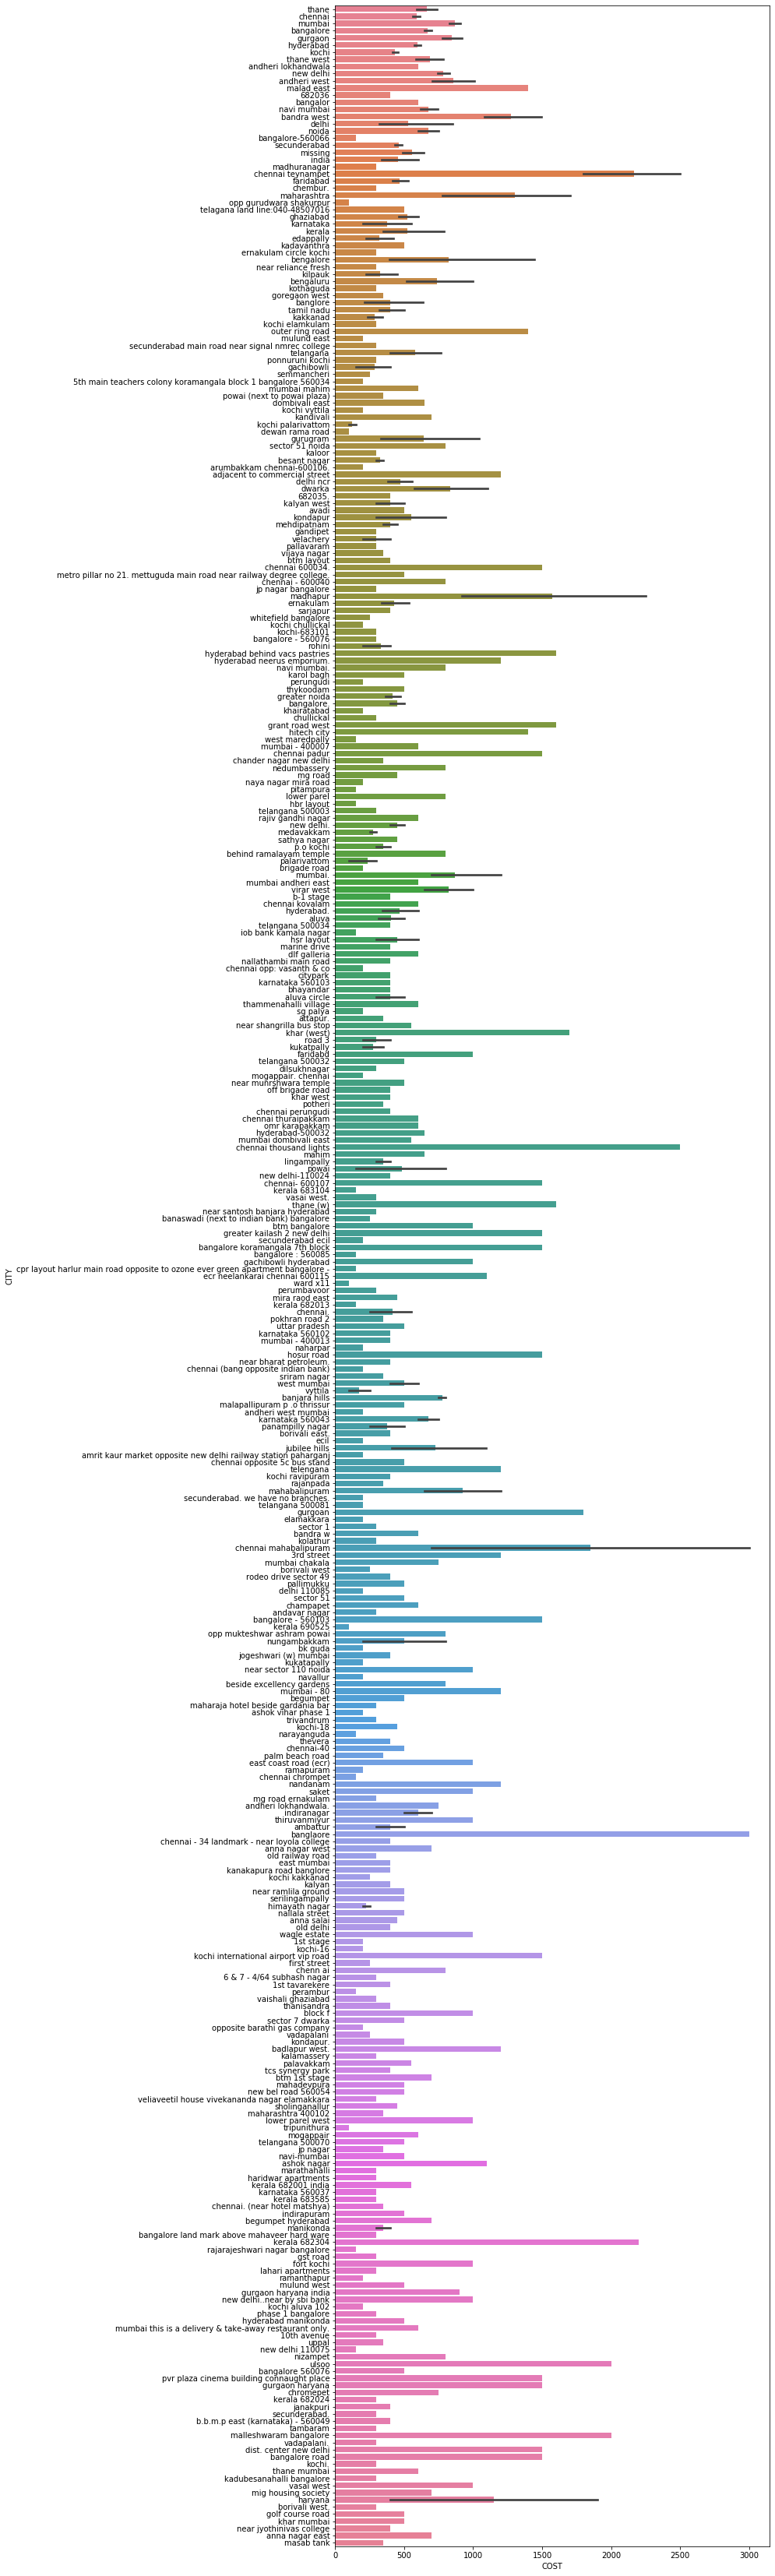

In [46]:
# Graph between CITY and COST
df_1=df.loc[df["dataset"]=='train']
plt.figure(figsize=(10,60))
sns.barplot(y='CITY',x='COST',data=df_1,palette='husl')

Banglore city have highest Food cost in Restaurant.

In [47]:
# Using Label Encoder so that object data can be convert to binary data so that data can be evaluated
from sklearn.preprocessing import LabelEncoder    
le=LabelEncoder()
for val in obj_col.index.values:
    df[val]=le.fit_transform(df[val].astype(str))
df

,CITY,COST,LOCALITY,RATING,VOTES,dataset,CUISINES_1,CUISINES_2,CUISINES_3,CUISINES_4,CUISINES_5,CUISINES_6,CUISINES_7,CUISINES_8,all_days,closed_weekend,closed_weekday,TITLE_1,TITLE_2
0,408,1200.0,320,3.600000,49.000000,1,61,32,71,89,83,75,57,22,1,0,0,5,16
1,75,1500.0,1202,4.200000,30.000000,1,6,62,45,89,83,75,57,22,1,0,0,5,1
2,75,800.0,1258,3.800000,221.000000,1,74,23,14,34,83,75,57,22,1,0,0,5,16
3,281,800.0,148,4.100000,24.000000,1,102,23,100,89,83,75,57,22,1,0,0,23,16
4,281,300.0,699,3.800000,165.000000,1,30,100,100,89,83,75,57,22,1,0,0,9,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16916,320,NaN,1174,3.900000,287.000000,0,74,64,23,89,83,75,57,22,1,0,0,5,16
16917,37,NaN,469,4.300000,469.000000,0,15,68,82,72,82,75,57,22,1,0,0,20,16
16918,131,NaN,1362,3.700000,53.000000,0,29,68,100,89,83,75,57,22,1,0,0,23,16
16919,220,NaN,628,3.784293,419.134506,0,84,12,100,89,83,75,57,22,0,0,0,23,16


In [48]:
df.skew()

CITY               0.189084
COST               3.978358
LOCALITY           0.368745
RATING            -0.553586
VOTES             13.015073
dataset           -1.152526
CUISINES_1        -0.016683
CUISINES_2         0.058541
CUISINES_3        -0.826330
CUISINES_4        -2.107453
CUISINES_5        -4.080269
CUISINES_6        -6.709247
CUISINES_7        -9.971851
CUISINES_8       -13.271808
all_days          -1.990313
closed_weekend    11.358817
closed_weekday     7.517750
TITLE_1            0.076347
TITLE_2           -3.077014
dtype: float64

In [49]:
#lets remove the skewness
for i in df.drop(['COST'],axis=1).columns:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])
    if df.skew().loc[i]<-0.5:
        df[i]=np.square(df[i])
df.skew()

CITY               0.189084
COST               3.978358
LOCALITY           0.368745
RATING            -0.134280
VOTES             -0.178299
dataset           -1.152526
CUISINES_1        -0.016683
CUISINES_2         0.058541
CUISINES_3        -0.607206
CUISINES_4        -1.837923
CUISINES_5        -3.694753
CUISINES_6        -6.062260
CUISINES_7        -9.187202
CUISINES_8       -12.869764
all_days          -1.990313
closed_weekend    11.358817
closed_weekday     7.517750
TITLE_1            0.076347
TITLE_2           -2.607009
dtype: float64

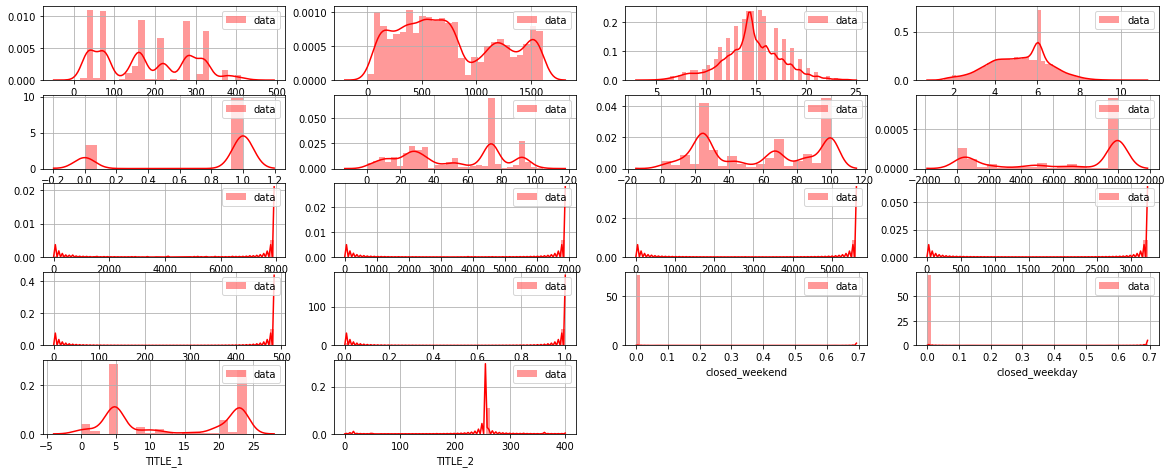

In [50]:
# Checking the Normal distribution of the dataset.
plt.figure(figsize=(20,16))
for i,col in enumerate(list(df.drop(['COST'],axis=1).columns.values)):
    plt.subplot(10,4,i+1)
    sns.distplot(df[col],color='r',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout
# Distribution is looking well.

In [51]:
# Checking the correlation
df.corr().style.background_gradient(cmap='YlGnBu').set_precision(2)

,CITY,COST,LOCALITY,RATING,VOTES,dataset,CUISINES_1,CUISINES_2,CUISINES_3,CUISINES_4,CUISINES_5,CUISINES_6,CUISINES_7,CUISINES_8,all_days,closed_weekend,closed_weekday,TITLE_1,TITLE_2
CITY,1,0.042,0.032,0.055,0.14,-0.0044,0.012,0.0082,0.005,-0.0079,-0.012,-6.9e-05,-0.0077,-0.0037,0.046,-0.0013,-0.022,-0.011,-0.011
COST,0.042,1,-0.017,0.34,0.31,nan,-0.036,-0.077,-0.18,-0.19,-0.12,-0.088,-0.055,-0.043,-0.072,-0.044,0.0095,-0.3,-0.27
LOCALITY,0.032,-0.017,1,-0.026,-0.031,0.0037,0.022,0.021,0.016,0.019,0.017,0.011,0.017,0.015,0.0045,-0.0088,0.0067,0.036,0.017
RATING,0.055,0.34,-0.026,1,0.55,0.0026,-0.08,-0.061,-0.11,-0.15,-0.12,-0.093,-0.055,-0.039,-0.15,0.0034,0.068,-0.16,-0.18
VOTES,0.14,0.31,-0.031,0.55,1,-0.0058,-0.028,-0.1,-0.19,-0.18,-0.13,-0.09,-0.056,-0.046,-0.085,-0.039,0.016,-0.18,-0.17
dataset,-0.0044,nan,0.0037,0.0026,-0.0058,1,-0.0029,0.013,-0.0039,0.0017,0.0043,0.0047,0.015,0.0076,0.0011,0.0048,0.0033,0.0026,-0.0084
CUISINES_1,0.012,-0.036,0.022,-0.08,-0.028,-0.0029,1,0.039,-0.0078,0.039,0.036,0.045,0.037,0.032,0.027,-0.0051,-0.014,0.22,0.089
CUISINES_2,0.0082,-0.077,0.021,-0.061,-0.1,0.013,0.039,1,0.28,0.17,0.11,0.088,0.054,0.047,0.013,0.024,0.013,0.14,0.13
CUISINES_3,0.005,-0.18,0.016,-0.11,-0.19,-0.0039,-0.0078,0.28,1,0.45,0.25,0.17,0.12,0.087,0.017,0.033,0.014,0.18,0.14
CUISINES_4,-0.0079,-0.19,0.019,-0.15,-0.18,0.0017,0.039,0.17,0.45,1,0.47,0.3,0.2,0.14,0.034,0.026,0.0078,0.16,0.14


(19.0, 0.0)

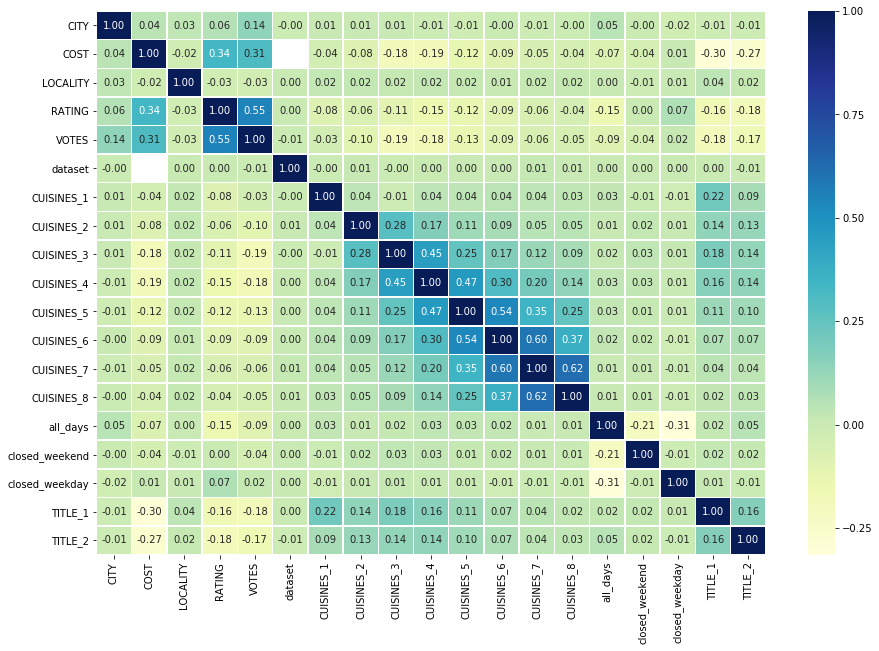

In [52]:
# Plotting Heatmap for Correlation
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Modeling


In [53]:
# Lets seprate the train and test from df ( here dataset= 1 for train) and (dataset=0) for test sets...
# df_train(train) where 1 = train
df_train=df.loc[df["dataset"]==1]
#In df_test(test) where = test
df_test=df.loc[df["dataset"]==0]

In [54]:
#re indexing the test dataset
df_test.reset_index(drop=True,inplace=True)

In [55]:
#Lets drop "Price" and "dataset" columns from the test dataset
#Also droping "dataset" columns from the train dataset
df_test.drop(columns=["COST","dataset"],inplace=True)
df_train.drop(columns=["dataset"],inplace=True)

In [56]:
#lets divide the df_train into input and output
X = df_train.drop("COST", axis=1)

y = df_train["COST"]

In [57]:
# Independent variables (no target column)
X.head()

,CITY,LOCALITY,RATING,VOTES,CUISINES_1,CUISINES_2,CUISINES_3,CUISINES_4,CUISINES_5,CUISINES_6,CUISINES_7,CUISINES_8,all_days,closed_weekend,closed_weekday,TITLE_1,TITLE_2
0,408,320,12.96,3.912023,61,32,5041,7921,6889,5625,3249,484,1,0.0,0.0,5,256
1,75,1202,17.64,3.433987,6,62,2025,7921,6889,5625,3249,484,1,0.0,0.0,5,1
2,75,1258,14.44,5.402677,74,23,196,1156,6889,5625,3249,484,1,0.0,0.0,5,256
3,281,148,16.81,3.218876,102,23,10000,7921,6889,5625,3249,484,1,0.0,0.0,23,256
4,281,699,14.44,5.111988,30,100,10000,7921,6889,5625,3249,484,1,0.0,0.0,9,256


In [58]:
# Target variable
y


0        1200.0
1        1500.0
2         800.0
3         800.0
4         300.0
          ...  
12685     500.0
12686    1800.0
12687    1300.0
12688     400.0
12689     600.0
Name: COST, Length: 12665, dtype: float64

In [59]:
#checking shape of input variable
X.shape

(12665, 17)

In [60]:
#checking shape of target variable
y.shape

(12665,)

In [61]:
#lets bring all features to common scale
from sklearn.preprocessing import StandardScaler
scale=StandardScaler() 
x=scale.fit_transform(X)
x=pd.DataFrame(x,columns=X.columns)
x

,CITY,LOCALITY,RATING,VOTES,CUISINES_1,CUISINES_2,CUISINES_3,CUISINES_4,CUISINES_5,CUISINES_6,CUISINES_7,CUISINES_8,all_days,closed_weekend,closed_weekday,TITLE_1,TITLE_2
0,2.092461,-0.936822,-0.515397,-0.924277,0.348854,-0.745715,-0.390668,0.475087,0.271281,0.171286,0.109848,0.076293,0.415293,-0.08876,-0.131722,-0.902808,0.250017
1,-0.932528,0.997689,1.062294,-1.272916,-1.548968,0.153049,-1.123078,0.475087,0.271281,0.171286,0.109848,0.076293,0.415293,-0.08876,-0.131722,-0.902808,-3.373184
2,-0.932528,1.120515,-0.016469,0.162883,0.797430,-1.015344,-1.567235,-2.192708,0.271281,0.171286,0.109848,0.076293,0.415293,-0.08876,-0.131722,-0.902808,0.250017
3,0.938786,-1.314074,0.782490,-1.429801,1.763594,-1.015344,0.813583,0.475087,0.271281,0.171286,0.109848,0.076293,0.415293,-0.08876,-0.131722,1.140652,0.250017
4,0.938786,-0.105553,-0.016469,-0.049122,-0.720828,1.291484,0.813583,0.475087,0.271281,0.171286,0.109848,0.076293,0.415293,-0.08876,-0.131722,-0.448706,0.250017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12660,-0.133131,-0.798643,-0.016469,0.820560,0.797430,-1.195097,-1.055325,0.475087,0.271281,0.171286,0.109848,0.076293,-2.407940,-0.08876,-0.131722,1.140652,0.250017
12661,0.938786,-1.320654,1.348840,1.402592,-0.410275,-0.955427,0.813583,0.475087,0.271281,0.171286,0.109848,0.076293,-2.407940,-0.08876,-0.131722,-0.902808,-3.373184
12662,1.138636,1.739032,0.509428,0.898867,-0.513793,-0.955427,-1.608761,-2.506218,0.271281,0.171286,0.109848,0.076293,0.415293,-0.08876,-0.131722,0.345973,0.250017
12663,-0.932528,-0.094586,-0.754747,-1.227319,0.797430,0.872060,-1.486368,-0.124723,0.271281,0.171286,0.109848,0.076293,0.415293,-0.08876,-0.131722,-0.902808,0.250017


In [62]:
#        Function which will find best Random State and then calculate Maximum R2_Score corresponding to it
#                                  and print R2_score in one go.
def max_random_score(regr):
    max_r_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=r_state)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr > max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print('max r2 score corresponding to',final_r_state,'is:', max_r_score)
    return final_r_state


In [63]:
from xgboost import XGBRegressor

models = {"KNeighborsRegressor": KNeighborsRegressor(n_neighbors=18),
          "SVR": SVR(),
          "LR": LinearRegression(),
          "DecisionTreeRegressor":DecisionTreeRegressor(),
          "SVR":SVR(),
          "RandomForestRegressor":RandomForestRegressor(max_depth=2, random_state=0),
          "GradientBoostingClassifier":GradientBoostingRegressor(),
          "Lasso":Lasso(),
          "Ridge":Ridge(),
          "ElasticNet":ElasticNet(),
          "XGBRegressor":XGBRegressor(),
          "lightgbm":lgb.LGBMRegressor()
         }
# Create a function to fit and score models
def fit_and_score(models):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        r_state=max_random_score(model)
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=.22)
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_train, y_train)
    return model_scores

In [64]:
model_scores = fit_and_score(models=models)

model_scores


max r2 score corresponding to 89 is: 0.37663148904682
max r2 score corresponding to 91 is: 0.11674414240394426
max r2 score corresponding to 81 is: 0.2687256044708658
max r2 score corresponding to 88 is: 0.5695037293904919
max r2 score corresponding to 63 is: 0.3836609246413204
max r2 score corresponding to 86 is: 0.7503272525540899
max r2 score corresponding to 81 is: 0.26926476811336497
max r2 score corresponding to 81 is: 0.2687276669705587
max r2 score corresponding to 81 is: 0.2597418987902863
max r2 score corresponding to 87 is: 0.7765577219513198
max r2 score corresponding to 45 is: 0.7712436791221294


{'KNeighborsRegressor': 0.39264696586782344,
 'SVR': 0.0755609064784929,
 'LR': 0.2166759184210676,
 'DecisionTreeRegressor': 0.9998443656133331,
 'RandomForestRegressor': 0.3113908994035348,
 'GradientBoostingClassifier': 0.7023791140810961,
 'Lasso': 0.21662858367096516,
 'Ridge': 0.21667591743840775,
 'ElasticNet': 0.20514193633405708,
 'XGBRegressor': 0.9257043284391022,
 'lightgbm': 0.8290496875395584}

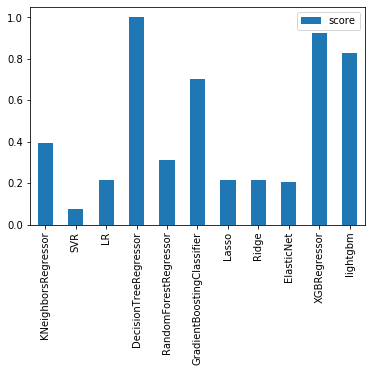

In [65]:
#Plotting bar plot of scores of various models
model_compare = pd.DataFrame(model_scores, index=["score"])
model_compare.T.plot.bar()

In [71]:
#Defining Instances For Differnt Models.
KNR=KNeighborsRegressor()
SV=SVR()
LR=LinearRegression()
DTR=DecisionTreeRegressor()
RFR=RandomForestRegressor()
GBR=GradientBoostingRegressor()
ABR=AdaBoostRegressor()
LS=Lasso()
RD=Ridge()
EN=ElasticNet()
lgb=lgb.LGBMRegressor()
XGBRegressor=XGBRegressor()
#     Putting Scikit-Learn machine learning Models in a list so that it can be used for further evaluation in loop.
models=[]
models.append(('KNeighborsRegressor',KNR))
models.append(('SVR',SV))
models.append(('LinearRegression',LR))
models.append(('DecisionTreeRegressor',DTR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))
models.append(('AdaBoostRegressor',ABR))
models.append(('Lasso',LS))
models.append(('Ridge',RD))
models.append(('ElasticNet',EN))
models.append(('XGBRegressor',XGBRegressor))
models.append(('lightgbm',lgb))


Model=[]
Score=[]
R2_score=[]
cvs=[]
mae=[]
mse=[]
Rmse=[]

# Create a function to fit and score models
# Make a dictionary to keep model scores
model_r_scores = {}
# Loop through models
#   For Loop to Calculate R_2 Score, Cross Val Score and errors.
for name, model in models:
    Model.append(name)
    print(model)
    print('\n')
    r_state=max_random_score(model)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=r_state)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    r2_scor=r2_score(y_test,y_pred)
    print('R2 Score : ',r2_scor)
    R2_score.append(r2_scor*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='r2').mean()
    print('Cross_val_score=',sc)
    cvs.append(sc*100)
    print('\n')
    Meanabsoluteerror = mean_absolute_error(y_test, y_pred)
    print('Mean absolute error=',Meanabsoluteerror)
    mae.append(Meanabsoluteerror)
    print('\n')
    Meansquarederror = mean_squared_error(y_test, y_pred)
    print('Mean squared error=',Meansquarederror)
    mse.append(Meansquarederror)
    print('\n')
    RootMeansquarederror = np.sqrt(mean_squared_error(y_test,y_pred))
    print('Root Mean squared error=',RootMeansquarederror)
    Rmse.append(RootMeansquarederror)
    print('\n')

        


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')


max r2 score corresponding to 45 is: 0.3399551047628965
R2 Score :  0.3399551047628965


Cross_val_score= 0.29085022621809564


Mean absolute error= 281.27369931826337


Mean squared error= 254473.62326515967


Root Mean squared error= 504.4537870461076


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


max r2 score corresponding to 91 is: 0.11674414240394426
R2 Score :  0.11674414240394426


Cross_val_score= 0.07929494235035017


Mean absolute error= 289.21161769781224


Mean squared error= 282428.9592600706


Root Mean squared error= 531.4404569282156


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


max r2 score corresponding to 81 is: 0.2687256044708658
R2 Score :  

In [72]:
result=pd.DataFrame({'Model':Model,'r2_score':R2_score,'Cross_val_score':cvs,'Mean absolute error':mae,'Mean squared error':mse,'Root Mean squared error':Rmse})
result

,Model,r2_score,Cross_val_score,Mean absolute error,Mean squared error,Root Mean squared error
0,KNeighborsRegressor,33.995510,29.085023,281.273699,254473.623265,504.453787
1,SVR,11.674414,7.929494,289.211618,282428.959260,531.440457
2,LinearRegression,26.872560,22.422989,298.986920,221744.885314,470.897956
3,DecisionTreeRegressor,55.003814,41.867791,251.960591,177842.051140,421.713233
4,RandomForestRegressor,76.260932,70.932093,183.984294,91423.000696,302.362367
5,GradientBoostingRegressor,75.039661,69.233359,190.045879,96126.315816,310.042442
6,AdaBoostRegressor,-46.392326,-25.868796,604.997039,564400.784662,751.266121
7,Lasso,26.926477,22.443592,298.731741,221581.394317,470.724329
8,Ridge,26.872767,22.423049,298.984880,221744.259901,470.897292
9,ElasticNet,25.974190,21.383117,299.463126,224469.021149,473.781618


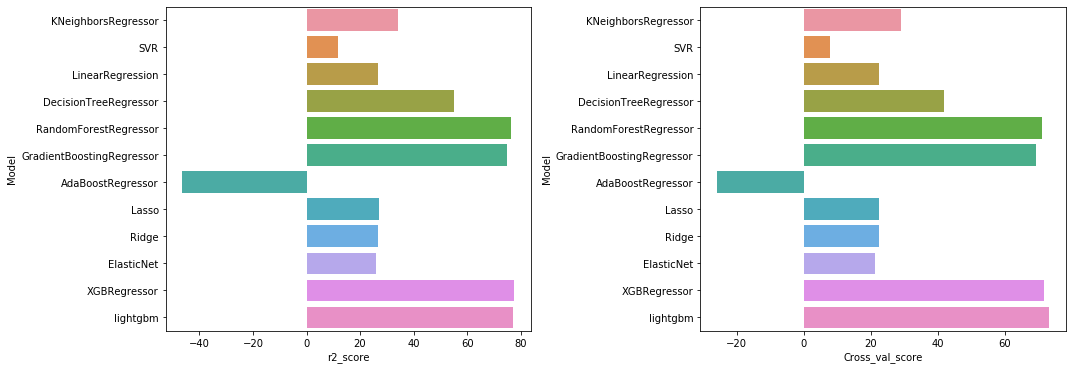

In [73]:
#Plotting bar plot of scores of various models
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.barplot(x = 'r2_score', y = 'Model', data = result)

plt.subplot(3,2,2)
sns.barplot(x = 'Cross_val_score', y = 'Model', data = result)
plt.tight_layout()
plt.show()


In [74]:
#function to evatulate errors
def evaluate_preds(y_test, y_preds):
    """
    Performs evaluation comparison on y_test labels vs. y_pred labels.
    """
    r2score = r2_score(y_test, y_preds)
    Meanabsoluteerror = mean_absolute_error(y_test, y_preds)
    Meansquarederror = mean_squared_error(y_test, y_preds)
    RootMeansquarederror = np.sqrt(mean_squared_error(y_test,y_preds))
    metric_dict = {"r2score": round(r2score, 2),
                   "Mean absolute error": round(Meanabsoluteerror, 2),
                   "Mean squared error": round(Meansquarederror, 2), 
                   "Root Mean squared error": round(RootMeansquarederror, 2),
                   }
    print(f"r2score: {r2score * 100:.2f}%")
    print(f"Mean absolute error: {Meanabsoluteerror:.2f}")
    print(f"Mean squared error: {Meansquarederror:.2f}")
    print(f"Root Mean squared error: {RootMeansquarederror:.2f}")

    return metric_dict

# Tuning a model with GridSearchCV


In [75]:
#lets use gridsearchcv to find out best parameters for RandomForestRegressor
grid5 = {'n_estimators': [100, 500,700, 1000],
          'max_depth': [None, 5, 10],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [4, 6],
          'min_samples_leaf': [1, 2]}

clf = RandomForestRegressor(n_jobs=1)

# Setup GridSearchCV
gs_clf5 = GridSearchCV(estimator=clf,
                      param_grid=grid5,
                      cv=5, # 5-fold cross-validation
                      verbose=2,n_jobs=-1) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf5.fit(x_train, y_train);

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   46.7s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 10.3min finished


In [76]:
# best parameters for RandomForestRegressor
print("Best parameter:",gs_clf5.best_params_)
print("score:",gs_clf5.best_score_)

Best parameter: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 700}
score: 0.6936930695648805


In [86]:
#checking accuracy score using best parameters which calculated from gridsearchCV
rf=RandomForestRegressor(n_estimators=700,max_depth=None, min_samples_leaf= 2, max_features= 'auto',min_samples_split=6)
max_random_score(rf)

max r2 score corresponding to 86 is: 0.7757708010667483


86

In [77]:
#for getting best set of parameters for GradientBoostingRegressor we will use grid searchCV
from sklearn.model_selection import GridSearchCV
grid1 = {"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500]}

clfD = GradientBoostingRegressor()

# Setup GridSearchCV
gs_clf1 = GridSearchCV(estimator=clfD,
                      param_grid=grid1,
                      cv=5, # 5-fold cross-validation
                      verbose=2,n_jobs=-1) # print out progress

# Fit the GridSearchCV
gs_clf1.fit(x, y);

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   27.4s finished


In [78]:
# best parameters for GradientBoostingRegressor
print("Best parameter:",gs_clf1.best_params_)
print("score:",gs_clf1.best_score_)

Best parameter: {'learning_rate': 0.1, 'n_estimators': 500}
score: 0.7251397514344673


In [82]:
#checking r2 score using best parameters which calculated from gridsearchCV
gbr=GradientBoostingRegressor(learning_rate=0.1, n_estimators= 500)
max_random_score(gbr)

max r2 score corresponding to 86 is: 0.777984024999517


86

In [80]:
from xgboost import XGBRegressor
#lets use gridsearchcv to find out best parameters for XGBRegressor
grid_6 = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
          "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
        "min_child_weight" : [ 1, 3, 5, 7 ],
        "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
        "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
         }
clf6 = XGBRegressor()

# Setup GridSearchCV
gs_clf6 = GridSearchCV(estimator=clf6,
                      param_grid=grid_6,
                      cv=5, # 5-fold cross-validation
                      verbose=2,refit=True,n_jobs=-1) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf6.fit(x_train, y_train);

Fitting 5 folds for each of 3840 candidates, totalling 19200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   46.2s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 4877 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 5808 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 6821 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done 7914 tasks      | elapsed: 21.1min
[Parallel(n_jobs=-1)]: Done 9089 tasks      | 

In [81]:
# best parameters for XGBRegressor
print("Best parameter:",gs_clf6.best_params_)
print("score:",gs_clf6.best_score_)

Best parameter: {'colsample_bytree': 0.4, 'gamma': 0.0, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 1}
score: 0.7218118105873055


In [83]:
#checking r2 score using best parameters which calculated from gridsearchCV
xgb=XGBRegressor(colsample_bytree= 0.4, gamma= 0.0, learning_rate= 0.1, max_depth= 6, min_child_weight= 1)
max_random_score(xgb)

max r2 score corresponding to 86 is: 0.798817896750994


86

In [84]:
import lightgbm as lgb
#lets use gridsearchcv to find out best parameters for XGBRegressor
grid_lgb = {"max_depth": [25,50, 75],
              "learning_rate" : [0.01,0.05,0.1],
              "num_leaves": [300,900,1200],
              "n_estimators": [200]
             }
clflgb =lgb.LGBMRegressor(silent=False)

# Setup GridSearchCV
gs_clflgb = GridSearchCV(estimator=clflgb,
                      param_grid=grid_lgb,
                      cv=5, # 5-fold cross-validation
                      verbose=2,refit=True,n_jobs=-1) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clflgb.fit(x_train, y_train);

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:   54.8s finished


In [85]:
# best parameters for LGBMRegressor
print("Best parameter:",gs_clflgb.best_params_)
print("score:",gs_clflgb.best_score_)

Best parameter: {'learning_rate': 0.05, 'max_depth': 25, 'n_estimators': 200, 'num_leaves': 900}
score: 0.69153558643692


In [87]:
#checking r2 score using best parameters and scores which calculated from gridsearchCV
import lightgbm as lgb

lgbr=lgb.LGBMRegressor(silent=False,learning_rate=0.05 ,max_depth=25, n_estimators= 200, num_leaves=900)
max_random_score(lgbr)

max r2 score corresponding to 86 is: 0.7666188700277928


86

# After all this process conclusion is that XGBRegressor is performing well because of  low rmse and high r2 score(accuracy score)


In [89]:
#Lets make the final model
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.20,random_state=86)
xgb=XGBRegressor(colsample_bytree= 0.4, gamma= 0.0, learning_rate= 0.1, max_depth= 6, min_child_weight= 1)
xgb.fit(x_train, y_train)
y_predxg = xgb.predict(x_test)
evaluate_preds(y_test,y_predxg)


r2score: 79.72%
Mean absolute error: 174.68
Mean squared error: 78529.39
Root Mean squared error: 280.23


{'r2score': 0.8,
 'Mean absolute error': 174.68,
 'Mean squared error': 78529.39,
 'Root Mean squared error': 280.23}

Text(0, 0.5, 'Predicted Y')

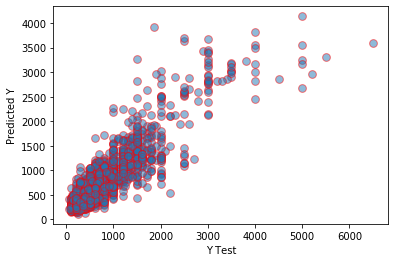

In [90]:
#plot of Y Test and Predicted Y
plt.scatter(x=y_test,y=y_predxg,marker="o",edgecolors ="r",s=60,alpha=0.5)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')


Getting linear relatipnship means that our model performes well.

In [91]:
# Printing predicted values
df1 = pd.DataFrame(data={"actual values": y_test, 
                   "predictions": y_predxg})

df1
# On the lest side values are those fields which are taken by machine for test...

,actual values,predictions
9101,550.0,302.482391
7912,500.0,776.875732
4276,200.0,358.227051
1531,300.0,302.888306
2996,350.0,485.527222
...,...,...
1503,1500.0,1572.011108
9733,450.0,617.594910
5494,600.0,518.881042
6330,350.0,266.759674


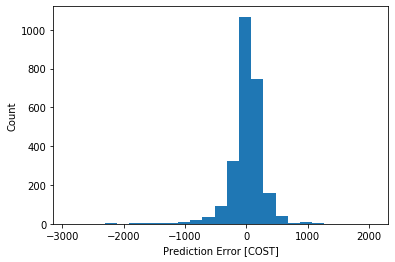

In [92]:
#lets visualize the error
error = y_predxg - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [COST]")
_ = plt.ylabel("Count")

In [93]:
#lets predict our test set (df_test)
price_pred=xgb.predict(df_test)
price_pred

array([343.57883, 343.57883, 343.57883, ..., 343.57883, 343.57883,
       343.57883], dtype=float32)

In [94]:
# Saving the Predicted values in csv file
df1=pd.DataFrame(price_pred)
df1.to_csv('Project19_Restaurant_Food_Cost_submission.csv',index=False)

# Feature importance
Feature importance seeks to figure out which different attributes of the data were most importance when it comes to predicting the target variable (Cost) 

In [95]:
# Find feature importance of our best model
xgb.feature_importances_

array([0.02781381, 0.01831784, 0.1015041 , 0.04148985, 0.03952901,
       0.04057587, 0.03540149, 0.02831367, 0.00841147, 0.00650118,
       0.00709611, 0.00242581, 0.01247462, 0.00945739, 0.01636611,
       0.5052693 , 0.09905245], dtype=float32)

In [96]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=40):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:80])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

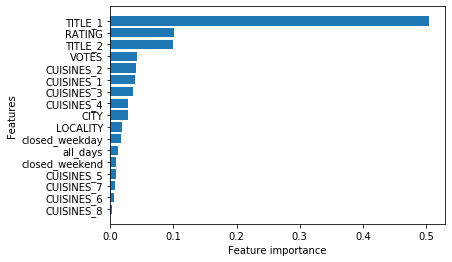

In [97]:
#bar plot of important features 
plot_features(x_train.columns, xgb.feature_importances_)

TITLE_1 contribute the most

In [98]:
#lets save the model using joblib
from sklearn.externals import joblib
joblib.dump(xgb,'Project19_Restaurant_Food_Cost_submission.pkl')

['Project19_Restaurant_Food_Cost_submission.pkl']

In [100]:
#read the file using joblib
xg_from_joblib=joblib.load('Project19_Restaurant_Food_Cost_submission.pkl')
joblib_y_preds = xg_from_joblib.predict(x_test)
evaluate_preds(y_test, joblib_y_preds)

r2score: 79.72%
Mean absolute error: 174.68
Mean squared error: 78529.39
Root Mean squared error: 280.23


{'r2score': 0.8,
 'Mean absolute error': 174.68,
 'Mean squared error': 78529.39,
 'Root Mean squared error': 280.23}

## Conclusion:

1) Rs 300 cost is the maximum occuring value out of the rest.
2) 3.9 Rating is the rating given by the people to the restaurant maximum number of times.
3) Maximum number of people likes North Indian Cuisine followed by chinese and then South indian.
4) Restaurants opened all days are more.
5) Restaurants closed on weekends are very less.
6) Restaurants closed on weekdays are also very less.
7) Restaurants having title Quick Bites are more followed by Casual Dining.
8) More the rating more the cost.
9) Restaurant with Fine dining title has more cost.
10) Kashmiri, Bar food, Lucknowi, sushi, Vietnamese, peruvian,Japanese,Mediterranean, europeon these cuisines have cost more than Rs 3000.
11) As the Rating increases the cost of the Food in the restaurant increases.
12) Banglore city have highest Food cost in Restaurant
13) Dr Zakir Husain Marg,Bandra Reclaimation Dock,Mansingh road are the Localities in which Retsaurant food cost is highest.
14) As votes increases the cost of the food in restaurant increases.


## Steps Followed: 

1) Data Analysis.
2) EDA Analysis.
3) Best parameters are found using Gridsearch cv and applied to models.
4) Best parameters are applied to each models and machine is trained for each models to find Best Accuracy Score.
5) AUC ROC Curves are made for each model.
6) A Result table is made comprises of accuracy,cross_val,auc_roc scores of each model.
7) XGBRegressor is used to train the model finally as it's accuracy score is best among the rest of the models.
8) Predicted values are saved in Project19_Restaurant_Food_Cost_submission.csv file.
9) Pickle file is named with Project19_Restaurant_Food_Cost_submission.pkl